In [1]:
%matplotlib inline

import os
import sys
import collections
import itertools
import re
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tables
import h5py
import matplotlib.animation as animation
from pylab import *
import scipy.stats as ss
import scipy.io
import brewer2mpl
from PIL import Image


## Loading the Data

In [2]:
# load this data file from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE111508
# download the file GSE111508_FitnessDataMultiEnv.txt.gz and decompress it.
# then remove the comments in the beginning (first 9 lines).

paper_data_df = pd.read_csv('GSE111508_FitnessDataMultiEnv.txt', delimiter = '\t')


In [3]:
trna_preprocessed_df = pd.read_pickle('trna_preprocessed_data_df.pkl')

In [4]:
import re

def str2list(s):
    try:
        return eval('['+re.sub(' +', ',', s.replace('\n', ''))[2:])
    except SyntaxError:
        return eval(re.sub(' +', ',', s))
    except Exception as e:
        print(s, e)
        return s

paper_data_df['1-neig'] = trna_preprocessed_df['1-neig']
paper_data_df['1-neig-indices'] = trna_preprocessed_df['1-neig-indices'].apply(str2list)
paper_data_df['2-neig-indices'] = trna_preprocessed_df['2-neig-indices'].apply(str2list)



In [5]:
data = paper_data_df

## Fitness Histogram plot, Figure 1 in manuscript

In [6]:
# these variables are used to define the colours, sizes, and font properties of the graphs
# in case of using colours we use in this order only - to ensure consistency
# first colour to use is colours[0] then 1,2,... so on up to 7
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors

# figure size - determined by the journal (3.25 width)
fig_size = (3.25,2.4375)

# now we move to figure's properties - any time we create a figure we add DPI, facecolour and edgecolour
figure_dpi = 1200
figure_facecolour = 'w'
figure_edgecolour = 'k'

# overall font size, and other overall parameters
font_size = 10
width_global = 0.7
subplot_only_one = 111
width_grid = width_global/2

# now we want to define font properties:
font_dict_axis = {'fontsize': font_size, 'fontweight' : 300}

# let us difine legend properties
legend_facecolour = 'w'
legend_edgecolour = '0'
legend_prop = {'size': font_size}  # sets legend's size (obviously)

# label parameters
label_length = 4
label_size = 6

# scatter size definition
scatter_size = 1

# This is a sort of a config file for figures in python

params = {
   'text.usetex': False,
    'axes.spines.bottom': True,
    'axes.spines.left': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'legend.fontsize': 7,
   'figure.figsize': [7, 4] # instead of 4.5, 4.5
   }
matplotlib.rc('font', family='arial') 
rcParams.update(params)
rcParams['axes.linewidth'] = width_global
rcParams["savefig.format"] = 'png'
plt.rcParams['figure.constrained_layout.use'] = False

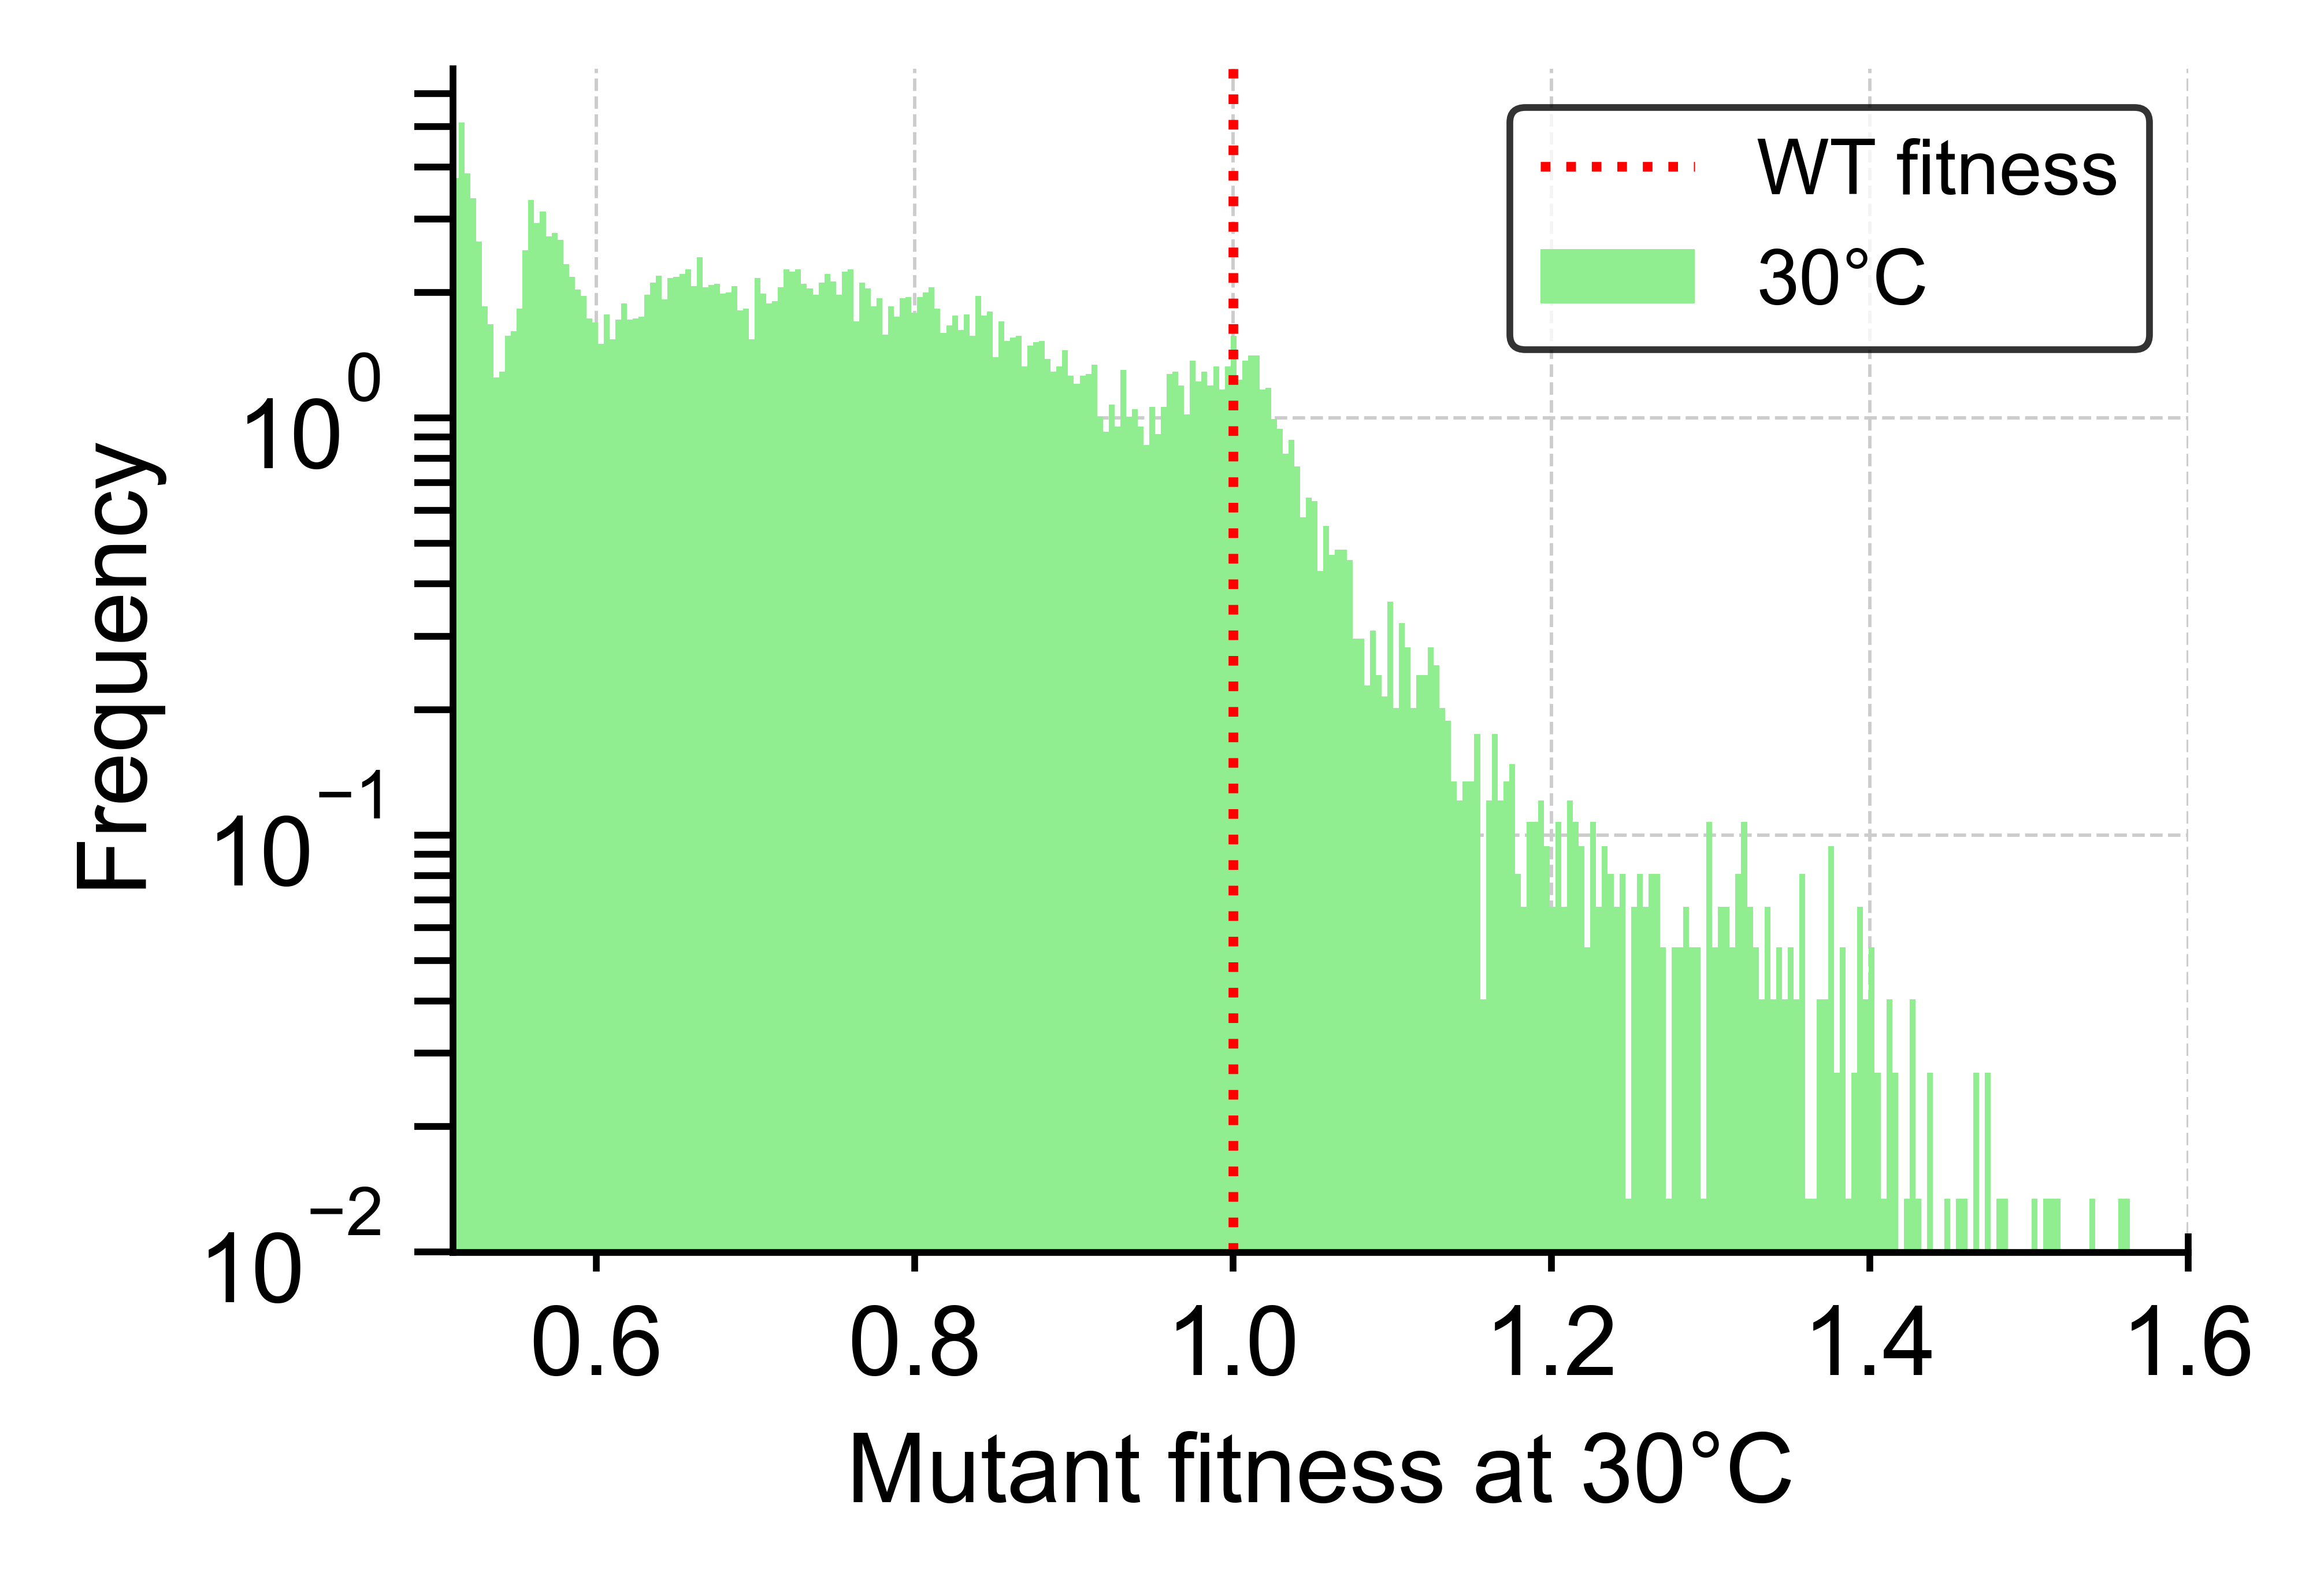

In [7]:
 # brewer2mpl.get_map args: set name  set type  number of colors
'''
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
'''
fig = figure(1,dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size) # no frame
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
# colour - #87ceeb light blue
ax1 = fig.add_subplot(111)
plt.hist(data['Fit30'],bins=np.linspace(0.51,1.6,300), density = True, label = '30'+u'\N{DEGREE SIGN}'+'C', color = '#90EE90' )
ax1.tick_params(axis='x', direction='inout', length = label_length,  width = width_global) #labelsize = 7,
ax1.tick_params(axis='y', direction='out', length = label_length,  width = width_global) #labelsize =  7,
plt.xlabel('Mutant fitness at 30'+u'\N{DEGREE SIGN}'+'C',  fontdict = font_dict_axis)
plt.ylabel('Frequency',  fontdict = font_dict_axis)
plt.yscale('log')
plt.tick_params(axis='y', which='both', length = label_length,  width = width_global)  # sets width of small ticks to all width
# labelsize = 7,
plt.axvline(1.0, color = 'r', linestyle = ':', label='WT fitness', linewidth = 1.0)
ax1.set_xlim(0.51, 1.6)
#ax1.set_xticklabels()  # this deletes the x-axis's numbers
ax1.set_frame_on(True)
legend = ax1.legend(loc=1,prop={'size':8})
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)
frame.set_linewidth(width_global)
ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)

#fig.savefig('30C_fitness_hist.png')


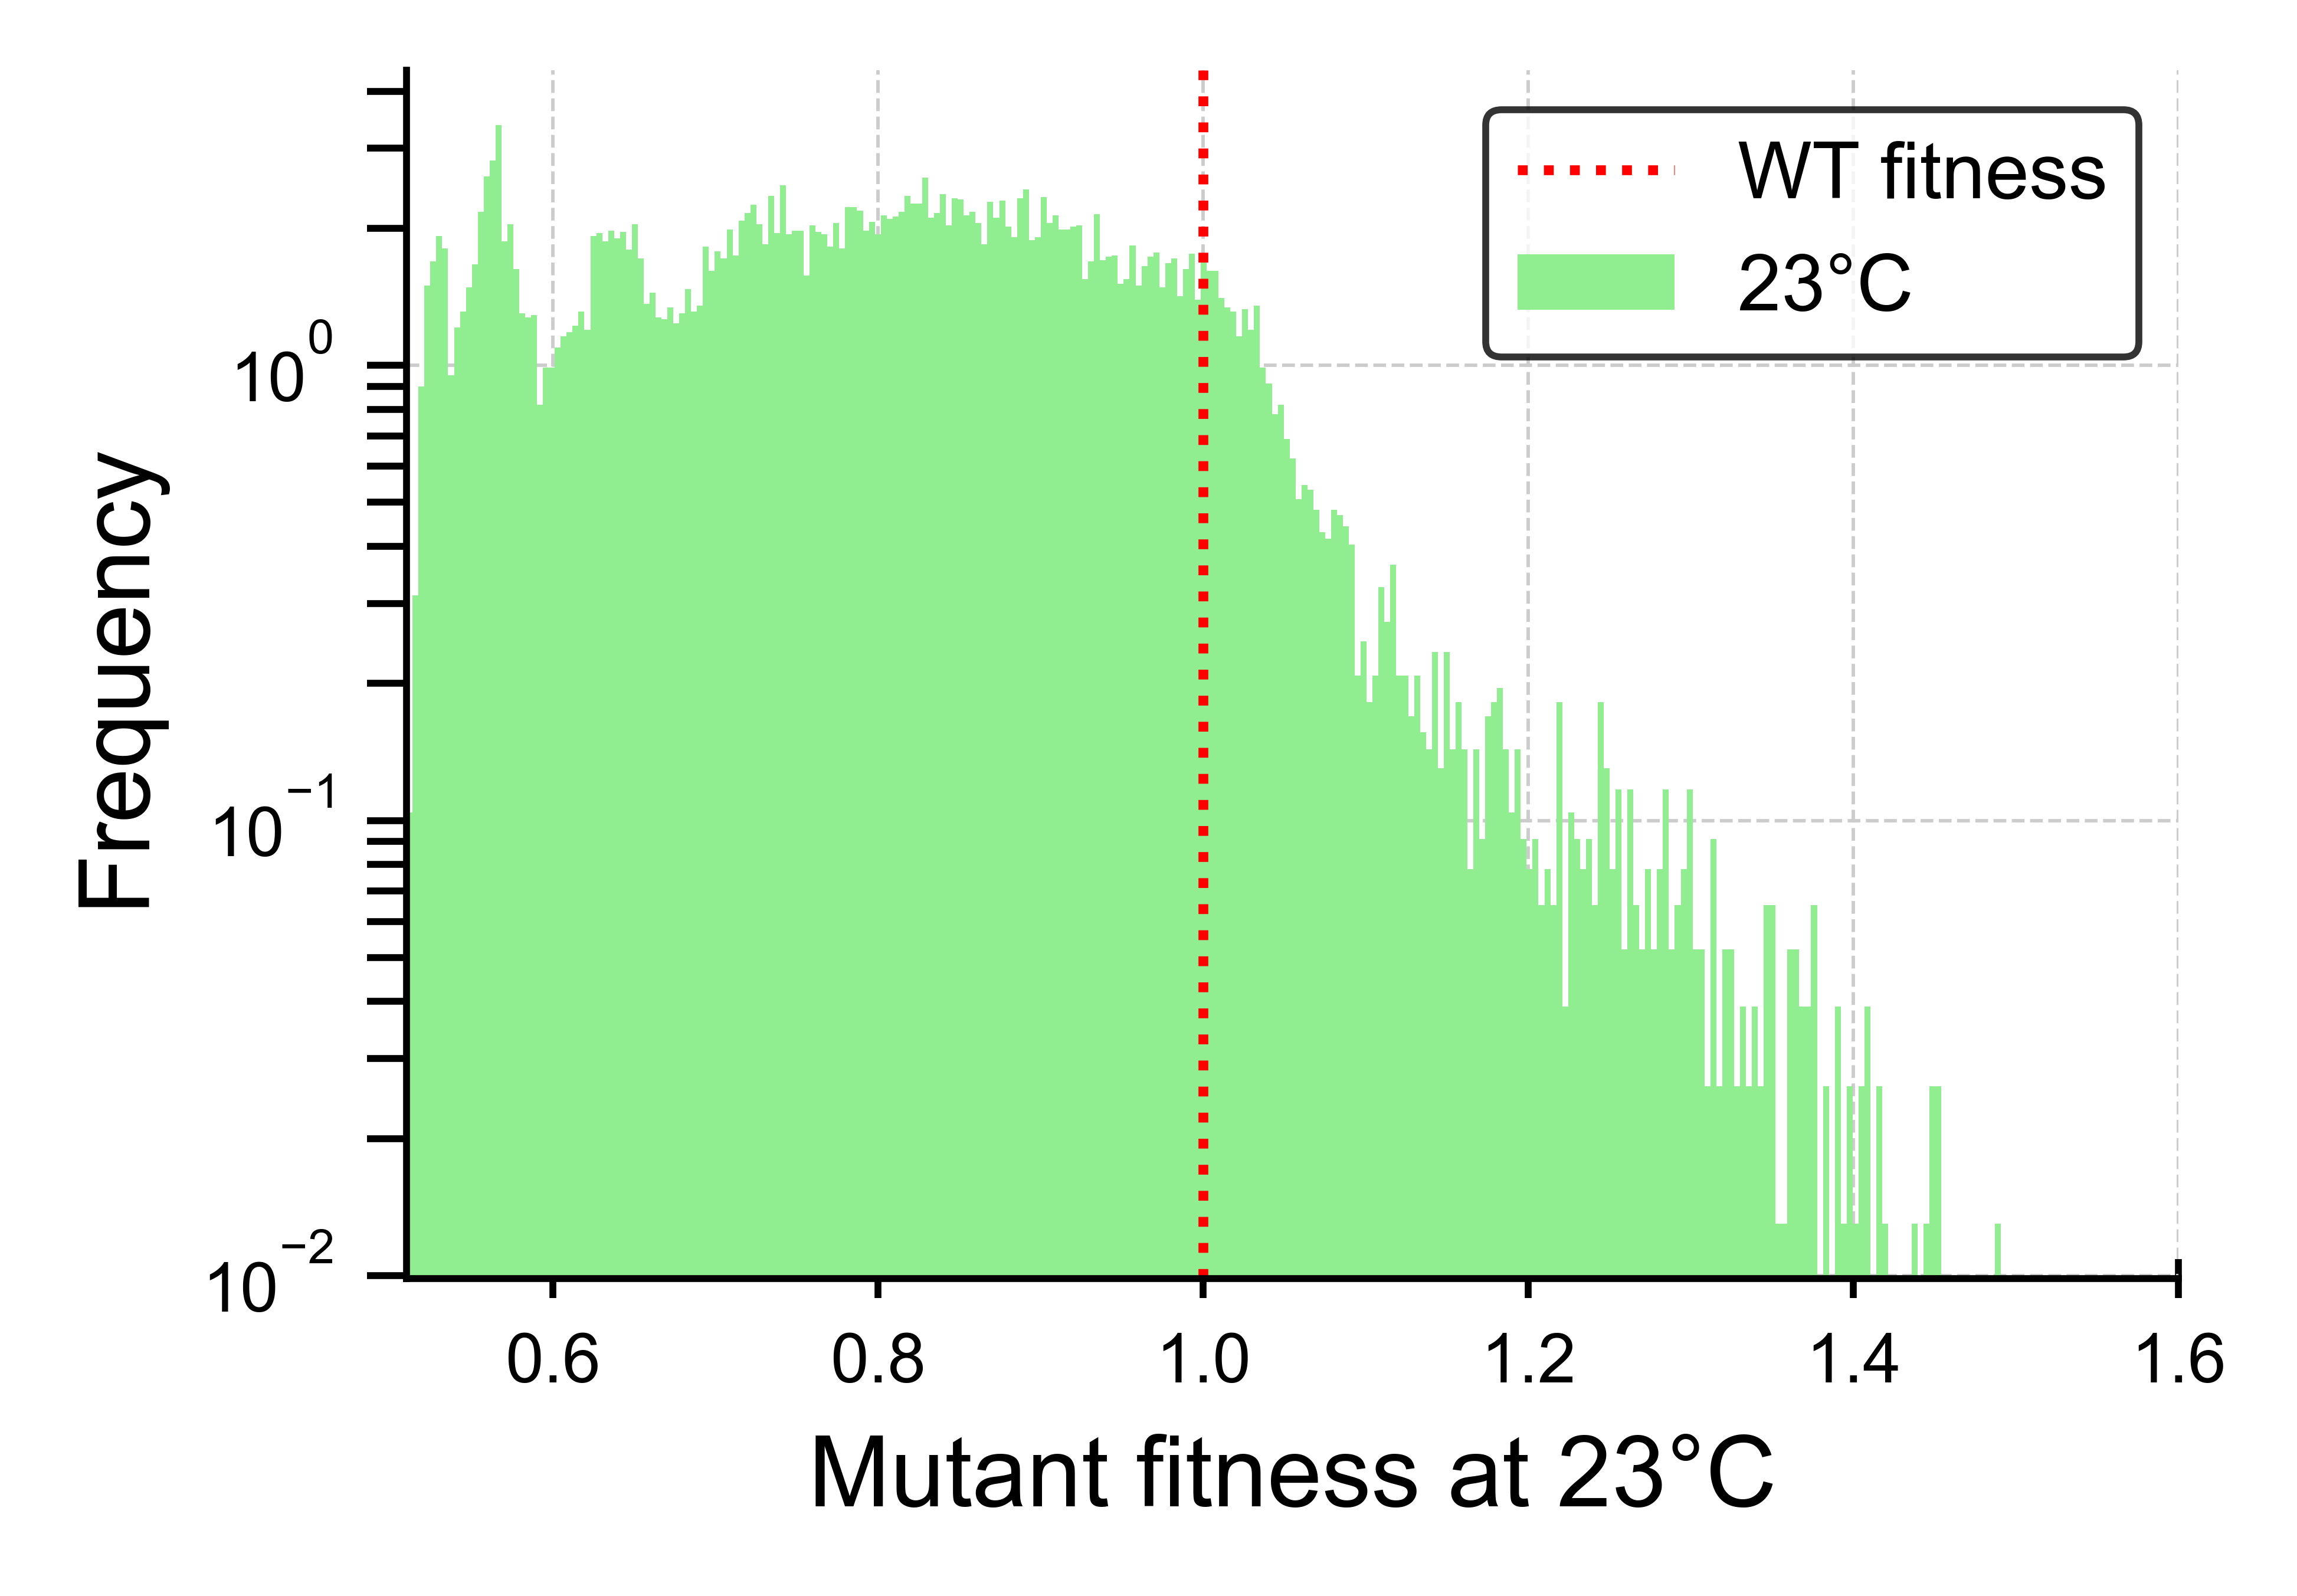

In [8]:
 # brewer2mpl.get_map args: set name  set type  number of colors
'''
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
'''
fig = figure(1,dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size) # no frame
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
# colour - #87ceeb light blue
ax1 = fig.add_subplot(111)
plt.hist(data['Fit23'],bins=np.linspace(0.51,1.6,300), density = True, label = '23'+u'\N{DEGREE SIGN}'+'C', color = '#90EE90' )
ax1.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax1.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
plt.xlabel('Mutant fitness at 23'+u'\N{DEGREE SIGN}'+'C',  fontdict = font_dict_axis)
plt.ylabel('Frequency',  fontdict = font_dict_axis)
plt.yscale('log')
plt.tick_params(axis='y', which='both', length = label_length, labelsize = 7, width = width_global)  # sets width of small ticks to all width
plt.axvline(1.0, color = 'r', linestyle = ':', label='WT fitness', linewidth = 1.0)
ax1.set_xlim(0.51, 1.6)
#ax1.set_xticklabels()  # this deletes the x-axis's numbers
ax1.set_frame_on(True)
legend = ax1.legend(loc=1,prop={'size':8})
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)
frame.set_linewidth(width_global)
ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)

#fig.savefig('23Fitness_hist.png', dpi=figure_dpi)


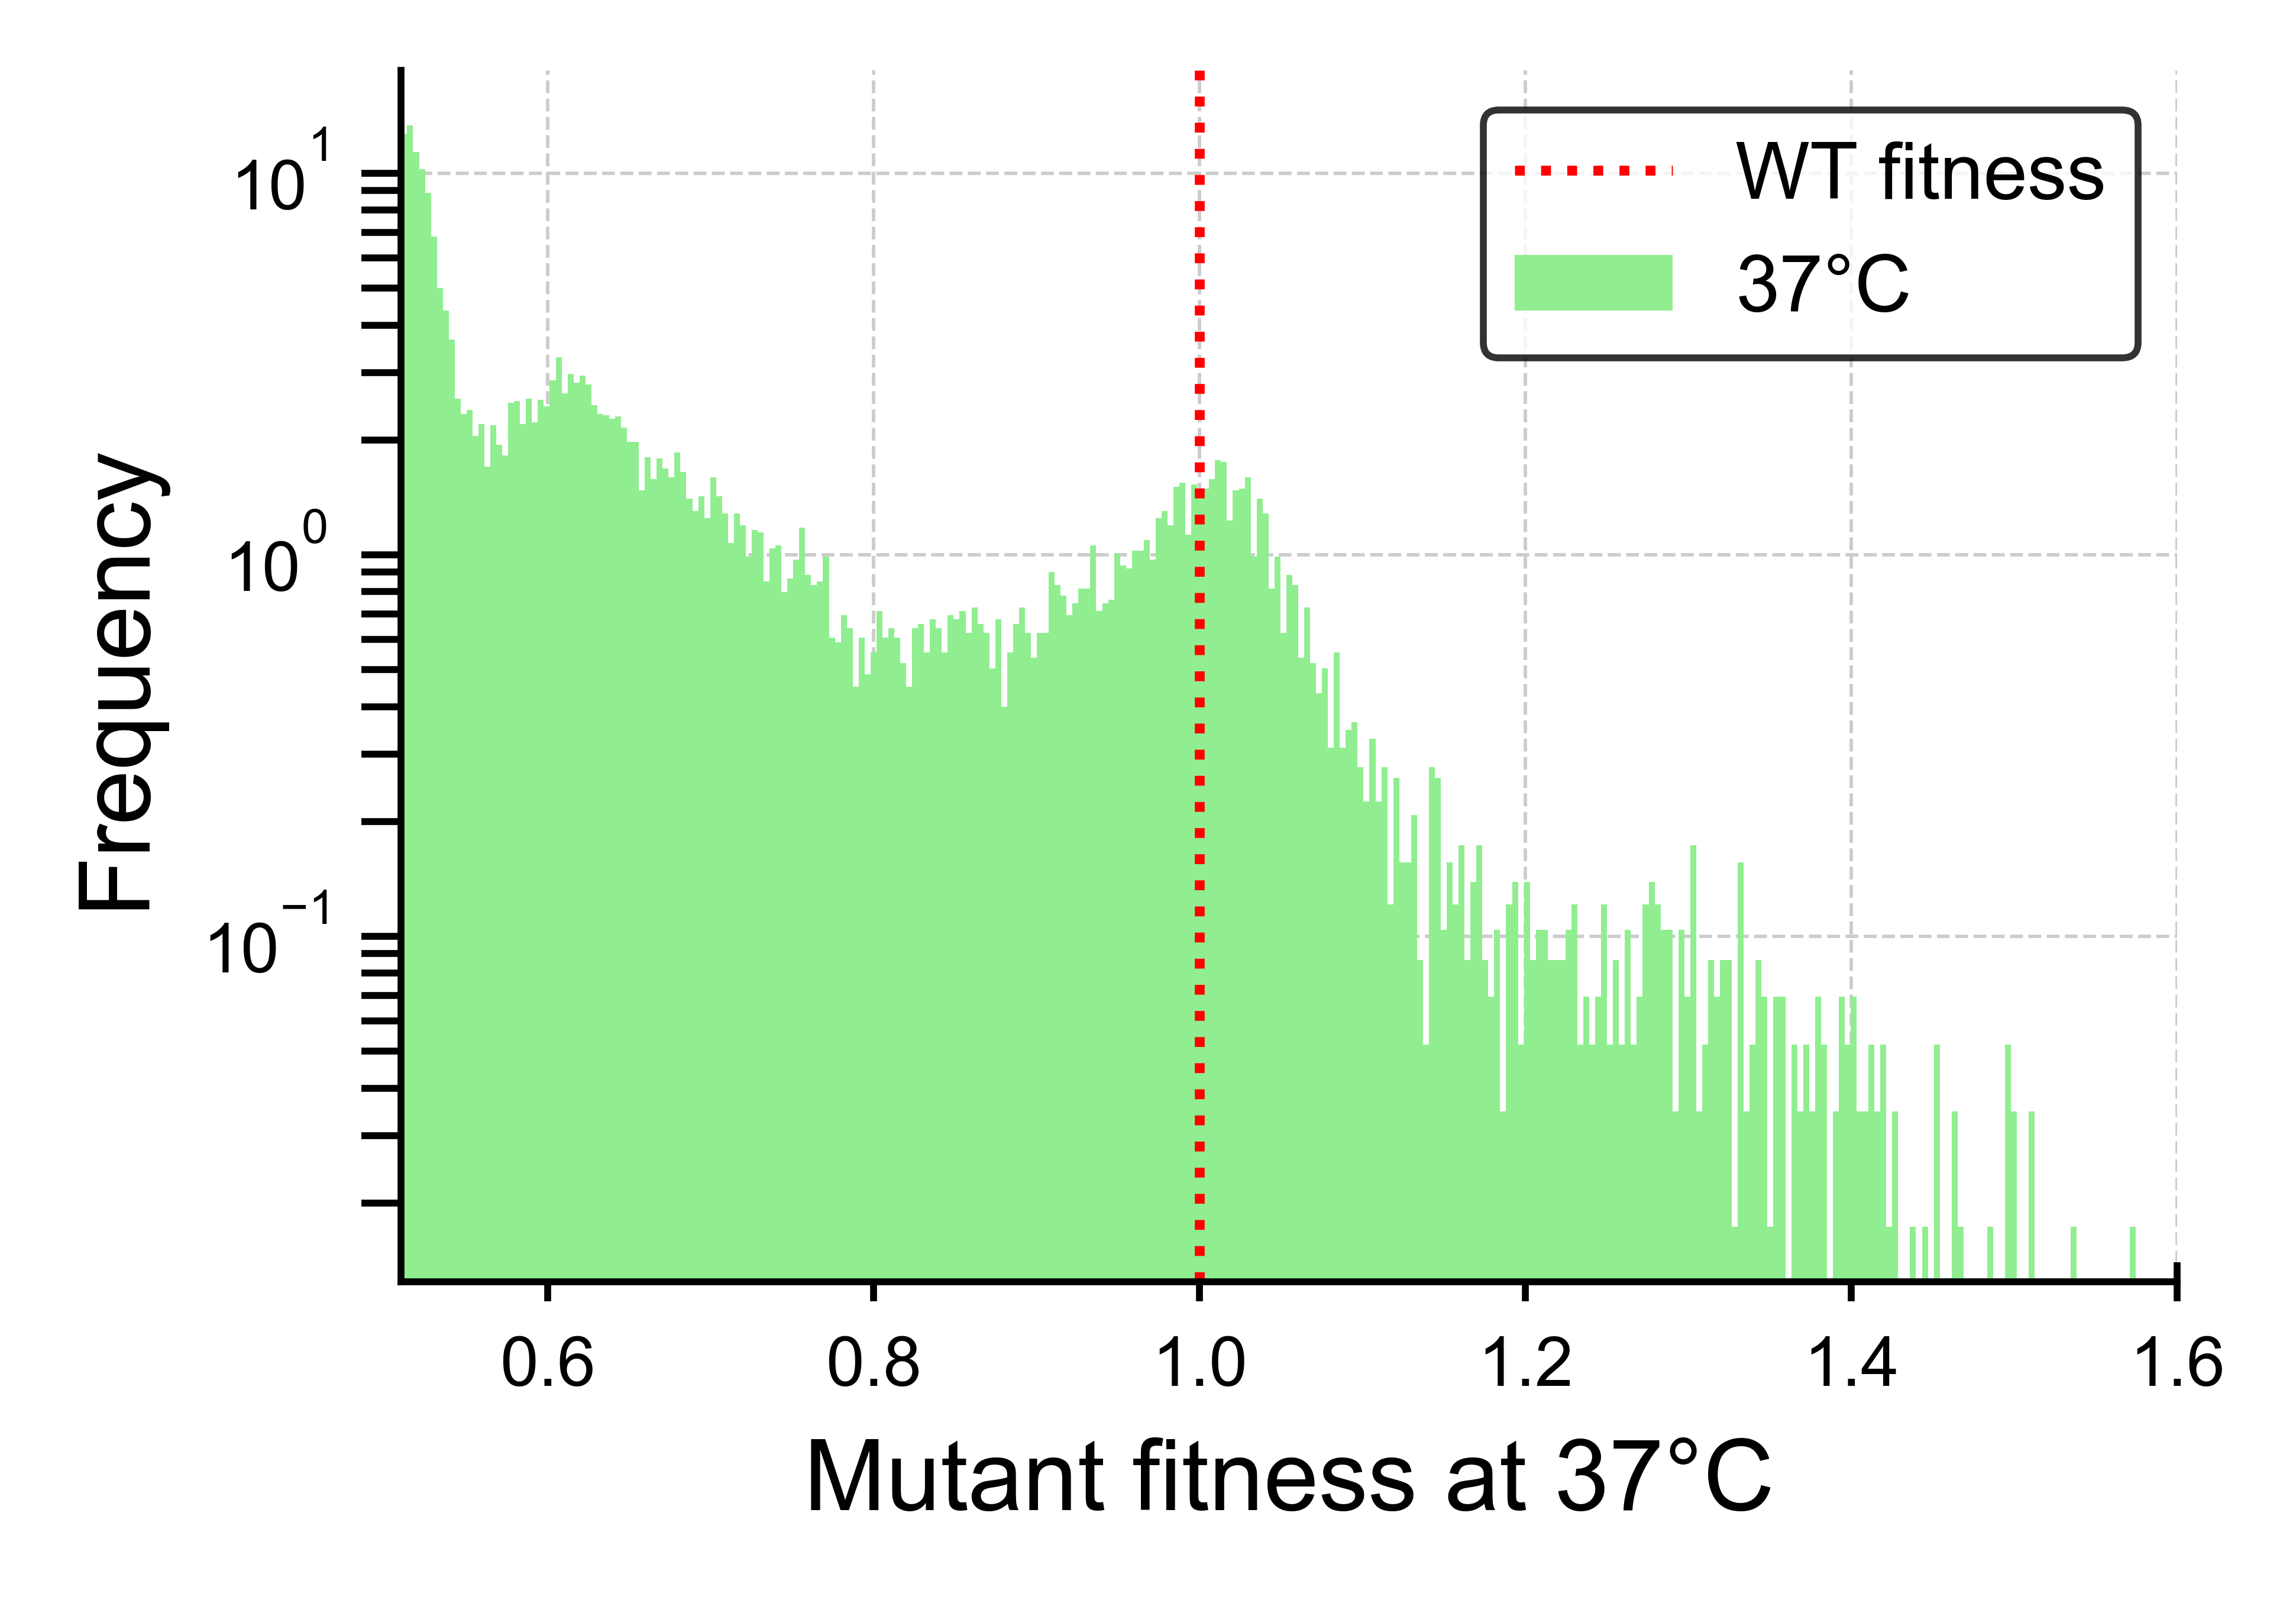

In [9]:
 # brewer2mpl.get_map args: set name  set type  number of colors
'''
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
'''
fig = figure(1,dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size) # no frame
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
# colour - #87ceeb light blue
ax1 = fig.add_subplot(111)
plt.hist(data['Fit37'],bins=np.linspace(0.51,1.6,300), density = True, label = '37'+u'\N{DEGREE SIGN}'+'C', color = '#90EE90' )
ax1.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax1.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
plt.xlabel('Mutant fitness at 37'+u'\N{DEGREE SIGN}'+'C',  fontdict = font_dict_axis)
plt.ylabel('Frequency',  fontdict = font_dict_axis)
plt.yscale('log')
plt.tick_params(axis='y', which='both', length = label_length, labelsize = 7, width = width_global)  # sets width of small ticks to all width
plt.axvline(1.0, color = 'r', linestyle = ':', label='WT fitness', linewidth = 1.0)
ax1.set_xlim(0.51, 1.6)
#ax1.set_xticklabels()  # this deletes the x-axis's numbers
ax1.set_frame_on(True)
legend = ax1.legend(loc=1,prop={'size':8})
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)
frame.set_linewidth(width_global)
ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)

#fig.savefig('37Fitness_hist.png')


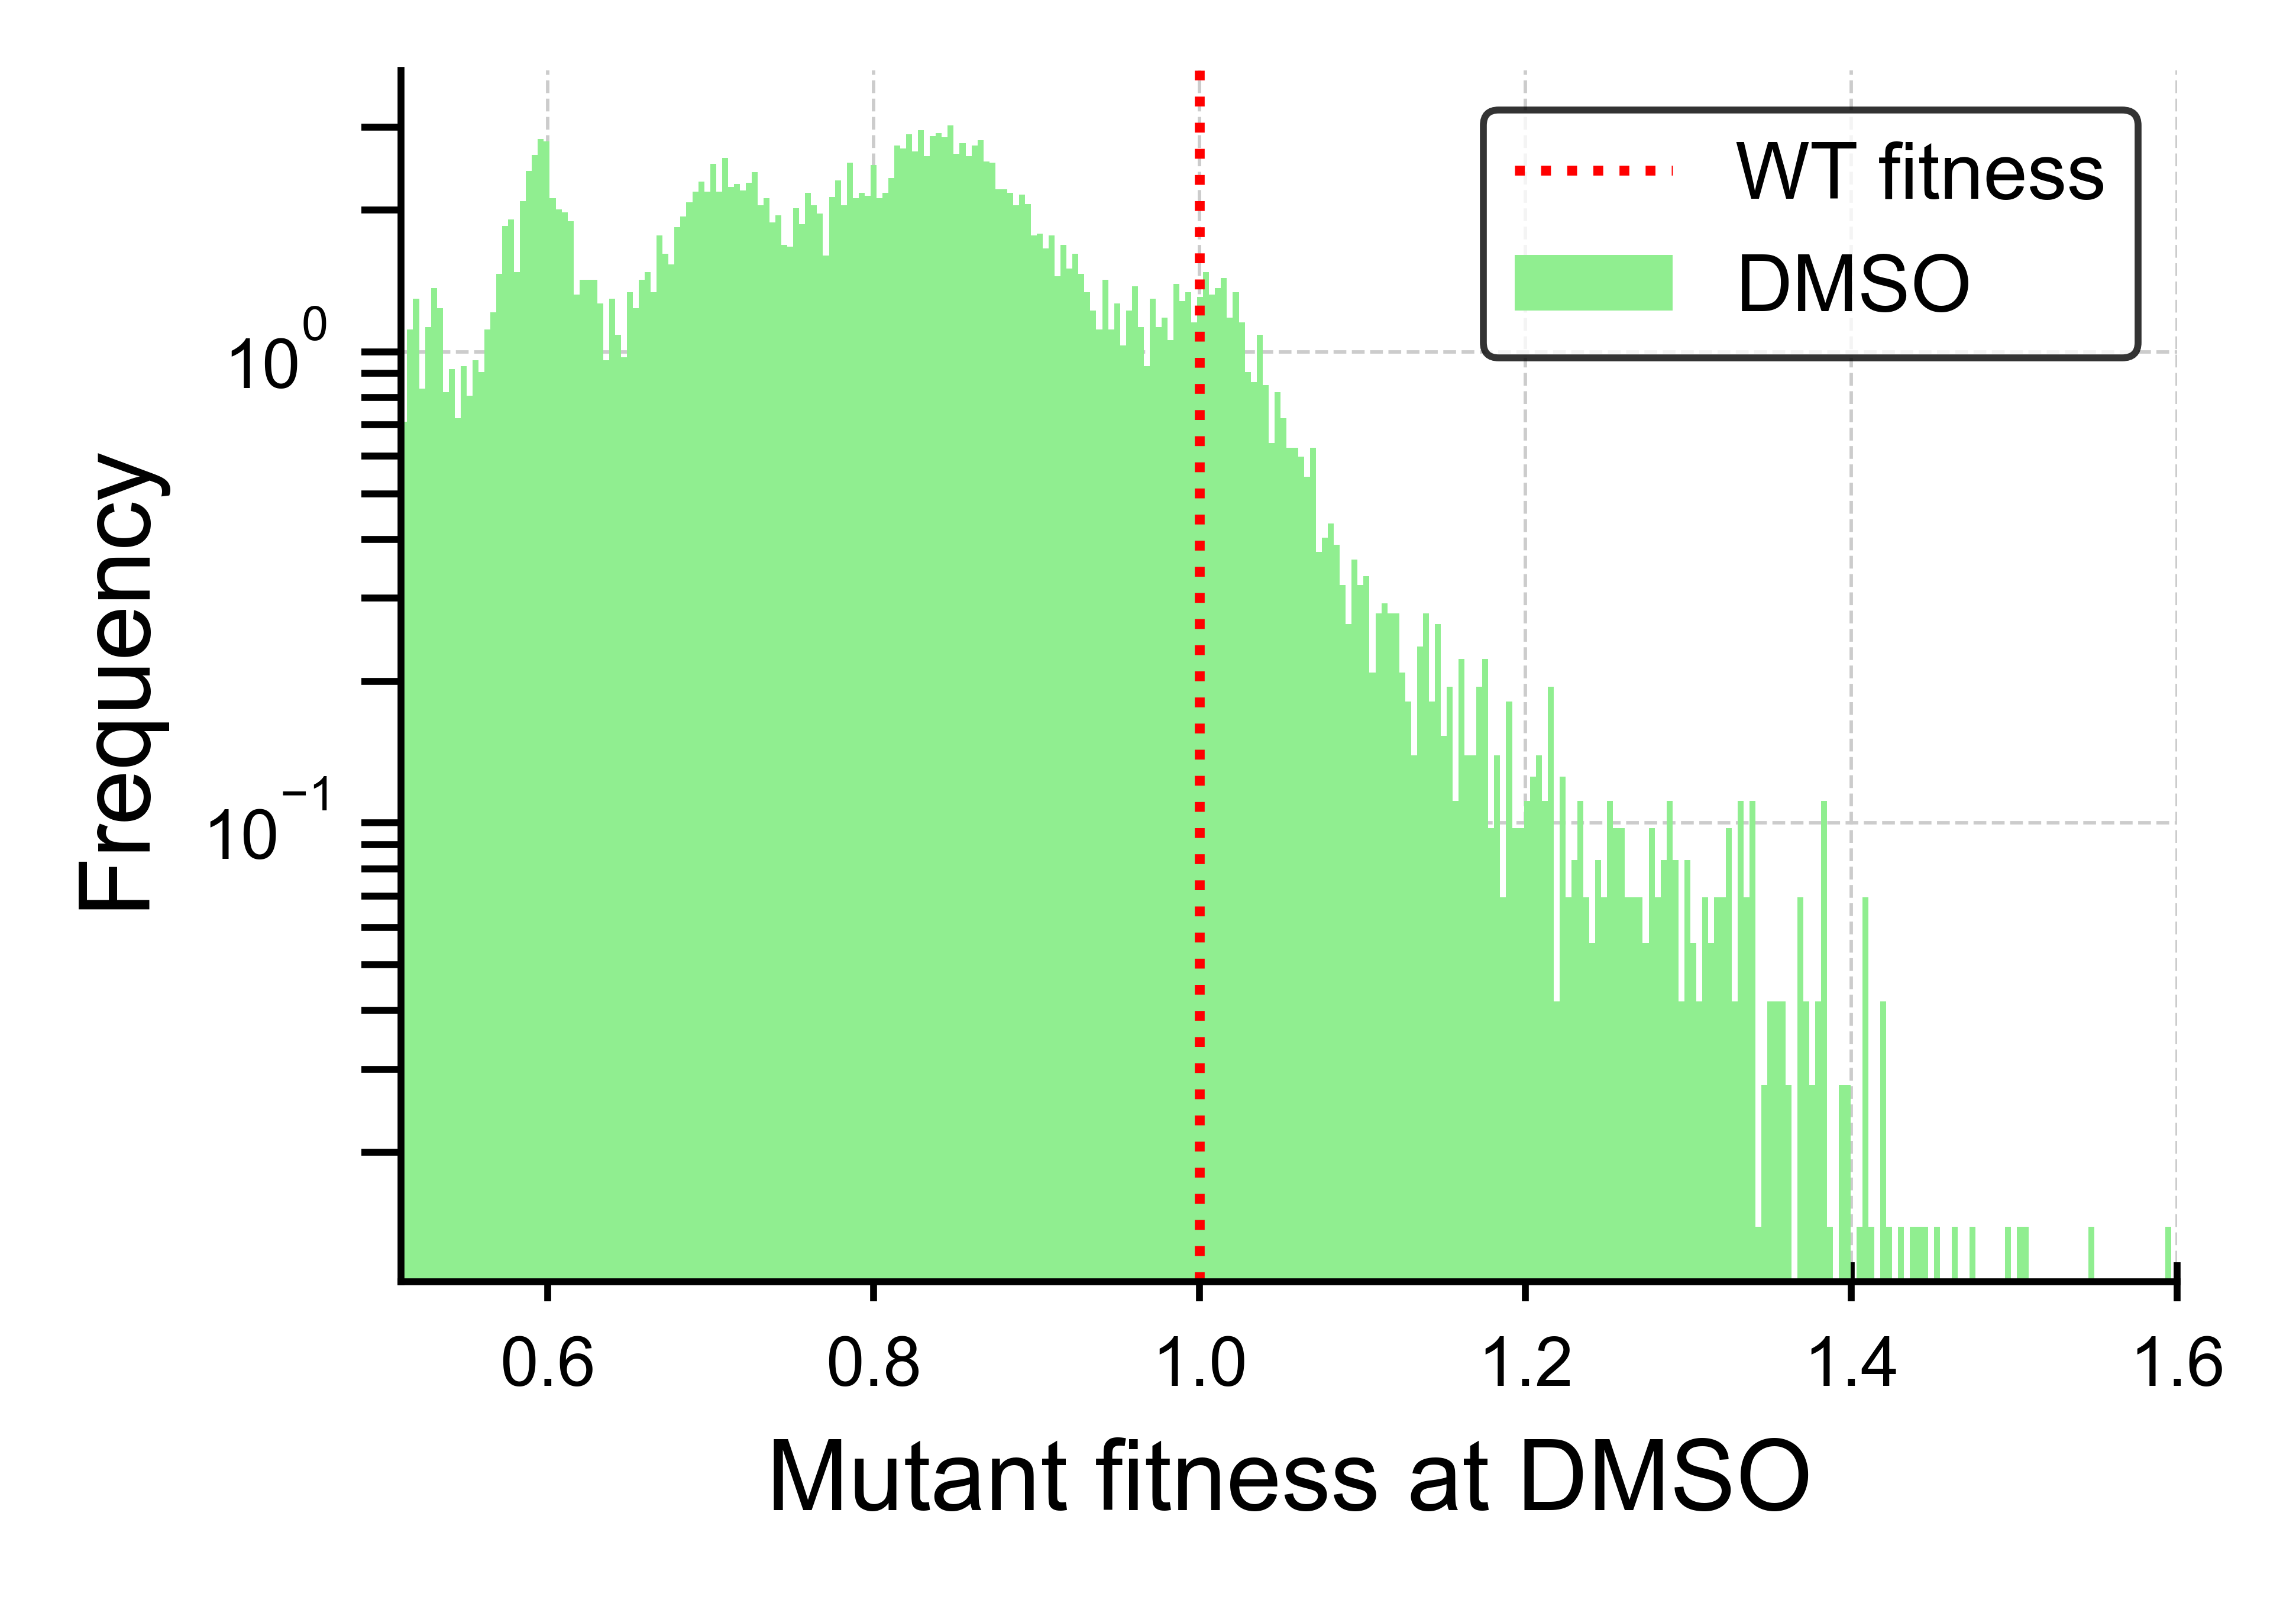

In [10]:
 # brewer2mpl.get_map args: set name  set type  number of colors
'''
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
'''
fig = figure(1,dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size) # no frame
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
# colour - #87ceeb light blue
ax1 = fig.add_subplot(111)
plt.hist(data['FitDMSO'],bins=np.linspace(0.51,1.6,300), density = True, label = 'DMSO', color = '#90EE90' )
ax1.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax1.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
plt.xlabel('Mutant fitness at DMSO',  fontdict = font_dict_axis)
plt.ylabel('Frequency',  fontdict = font_dict_axis)
plt.yscale('log')
plt.tick_params(axis='y', which='both', length = label_length, labelsize = 7, width = width_global)  # sets width of small ticks to all width
plt.axvline(1.0, color = 'r', linestyle = ':', label='WT fitness', linewidth = 1.0)
ax1.set_xlim(0.51, 1.6)
#ax1.set_xticklabels()  # this deletes the x-axis's numbers
ax1.set_frame_on(True)
legend = ax1.legend(loc=1,prop={'size':8})
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)
frame.set_linewidth(width_global)
ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)

#fig.savefig('DMSO_Fitness_hist.png')


## Fig 1B - fitness histograms in 4 conditions

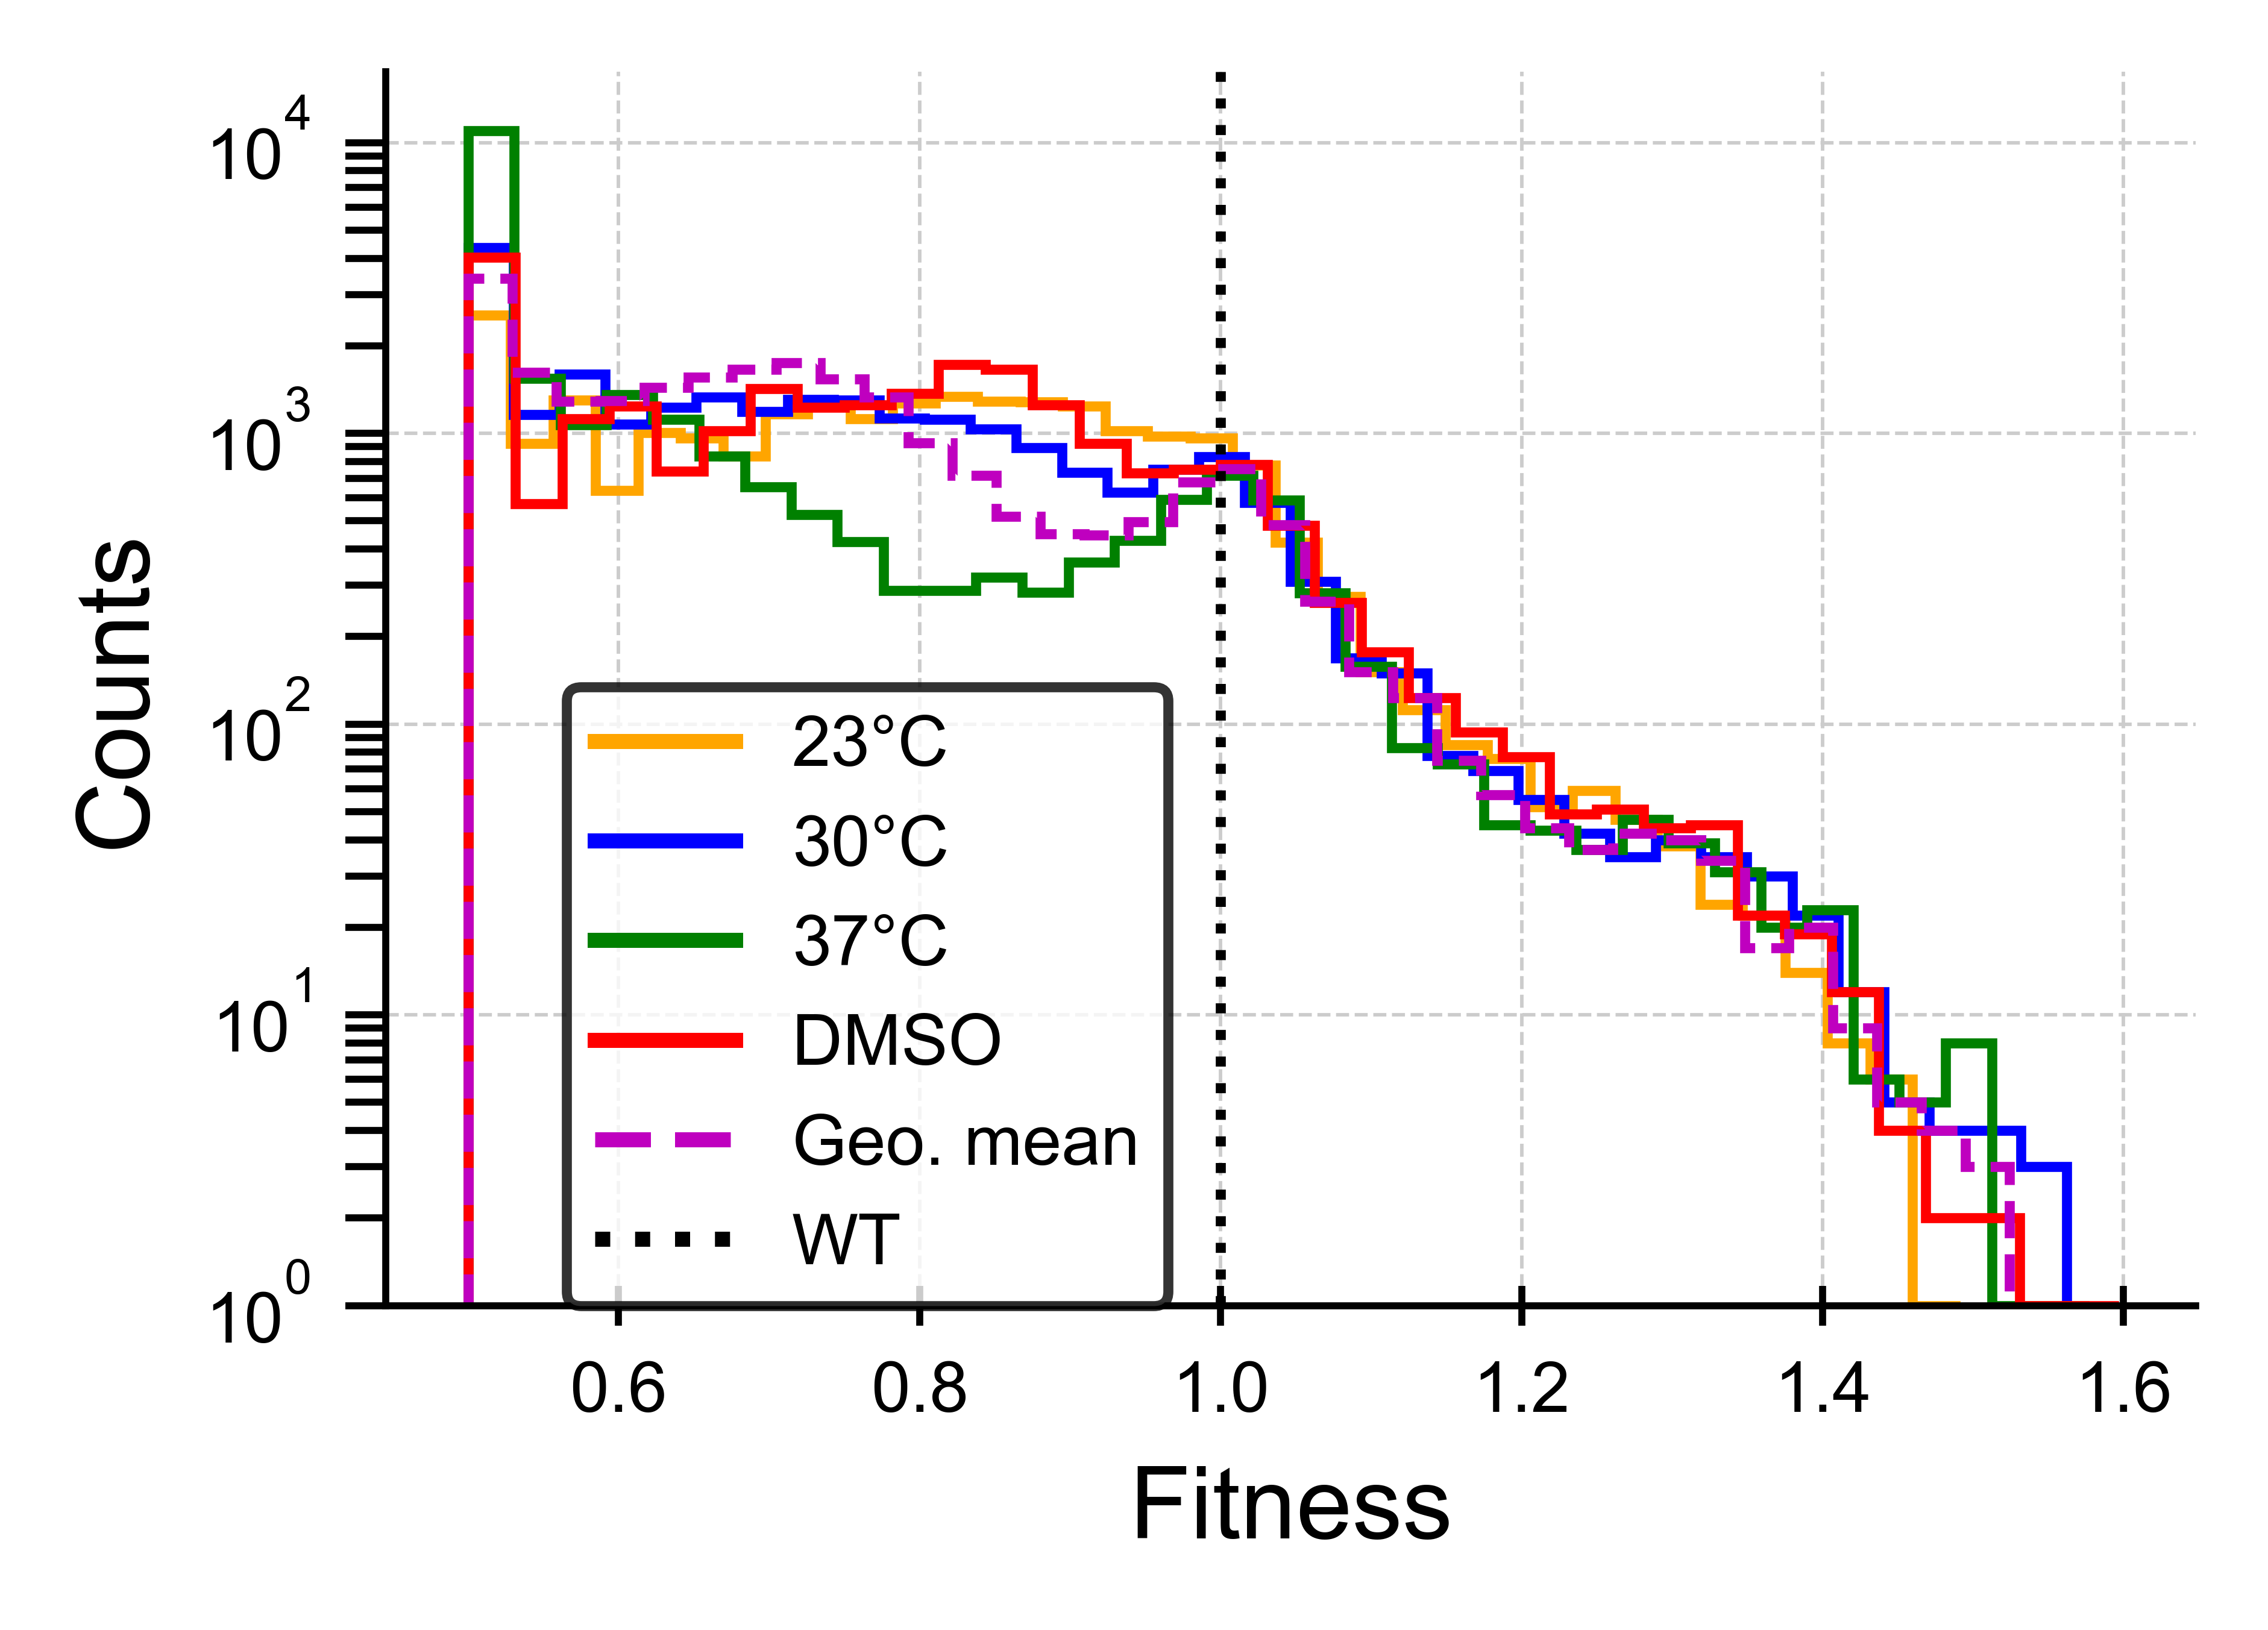

In [11]:
fig = figure(1,dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size) # no frame
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax1 = fig.add_subplot(111)

GeometricMeanFitRel = (data['Fit23']*data['Fit30']*data['Fit37']*data['FitDMSO'])**0.25

plt.hist(data['Fit23'], bins=35, log = True, histtype='step', color = 'orange', label='23'+u'\N{DEGREE SIGN}'+'C')
plt.hist(data['Fit30'], bins=35, log = True, histtype='step', color = 'b', label='30'+u'\N{DEGREE SIGN}'+'C')
plt.hist(data['Fit37'], bins=35, log = True, histtype='step', color = 'g', label='37'+u'\N{DEGREE SIGN}'+'C')
plt.hist(data['FitDMSO'], bins=35, log = True, histtype='step', color = 'r', label='DMSO')
plt.hist(GeometricMeanFitRel, bins=35, log = True, histtype='step', color = 'm', ls='--',label='Geometric mean')
plt.axvline(1.0, color = 'k', linestyle = ':', label='WT', linewidth = 1.0)
plt.gca().set_ylim(bottom=1)
ax1.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax1.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)

plt.yscale('log')
plt.tick_params(axis='y', which='both', length = label_length, labelsize = 7, width = width_global)  # sets width of small ticks to all width
plt.xlabel('Fitness')
plt.ylabel('Counts')


ax1.set_frame_on(True)
plt.legend()
    # Create new legend handles but use the colors from the existing ones
handle1 = matplotlib.lines.Line2D([], [], c='orange')
handle2 = matplotlib.lines.Line2D([], [], c='b')
handle3 = matplotlib.lines.Line2D([], [], c='g')
handle4 = matplotlib.lines.Line2D([], [], c='r')
handle5 = matplotlib.lines.Line2D([], [], c='m',linestyle = '--')
handle6 = matplotlib.lines.Line2D([], [], c='k',linestyle = ':')


handles, labels = ax1.get_legend_handles_labels()
plt.legend(handles=[handle1,handle2,handle3,handle4,handle5,handle6], labels=['23'+u'\N{DEGREE SIGN}'+'C','30'+u'\N{DEGREE SIGN}'+'C','37'+u'\N{DEGREE SIGN}'+'C','DMSO','Geo. mean','WT'],facecolor = legend_facecolour, edgecolor = legend_edgecolour, loc=(0.1,0))
ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)

#fig.savefig('Fig_1b_Fitness_hist_all_geo_mean.png', dpi = figure_dpi)

In [12]:
print('Fit30:', data[data['Fit30']>1]['Num'].count())
print('FitDMSO:',data[data['FitDMSO']>1]['Num'].count())
print('Fit23:',data[data['Fit23']>1]['Num'].count())
print('Fit37:',data[data['Fit37']>1]['Num'].count())

Fit30: 2075
FitDMSO: 2236
Fit23: 2441
Fit37: 2008


## Figure 1C - correlation between fitness values across conditions - high fitness

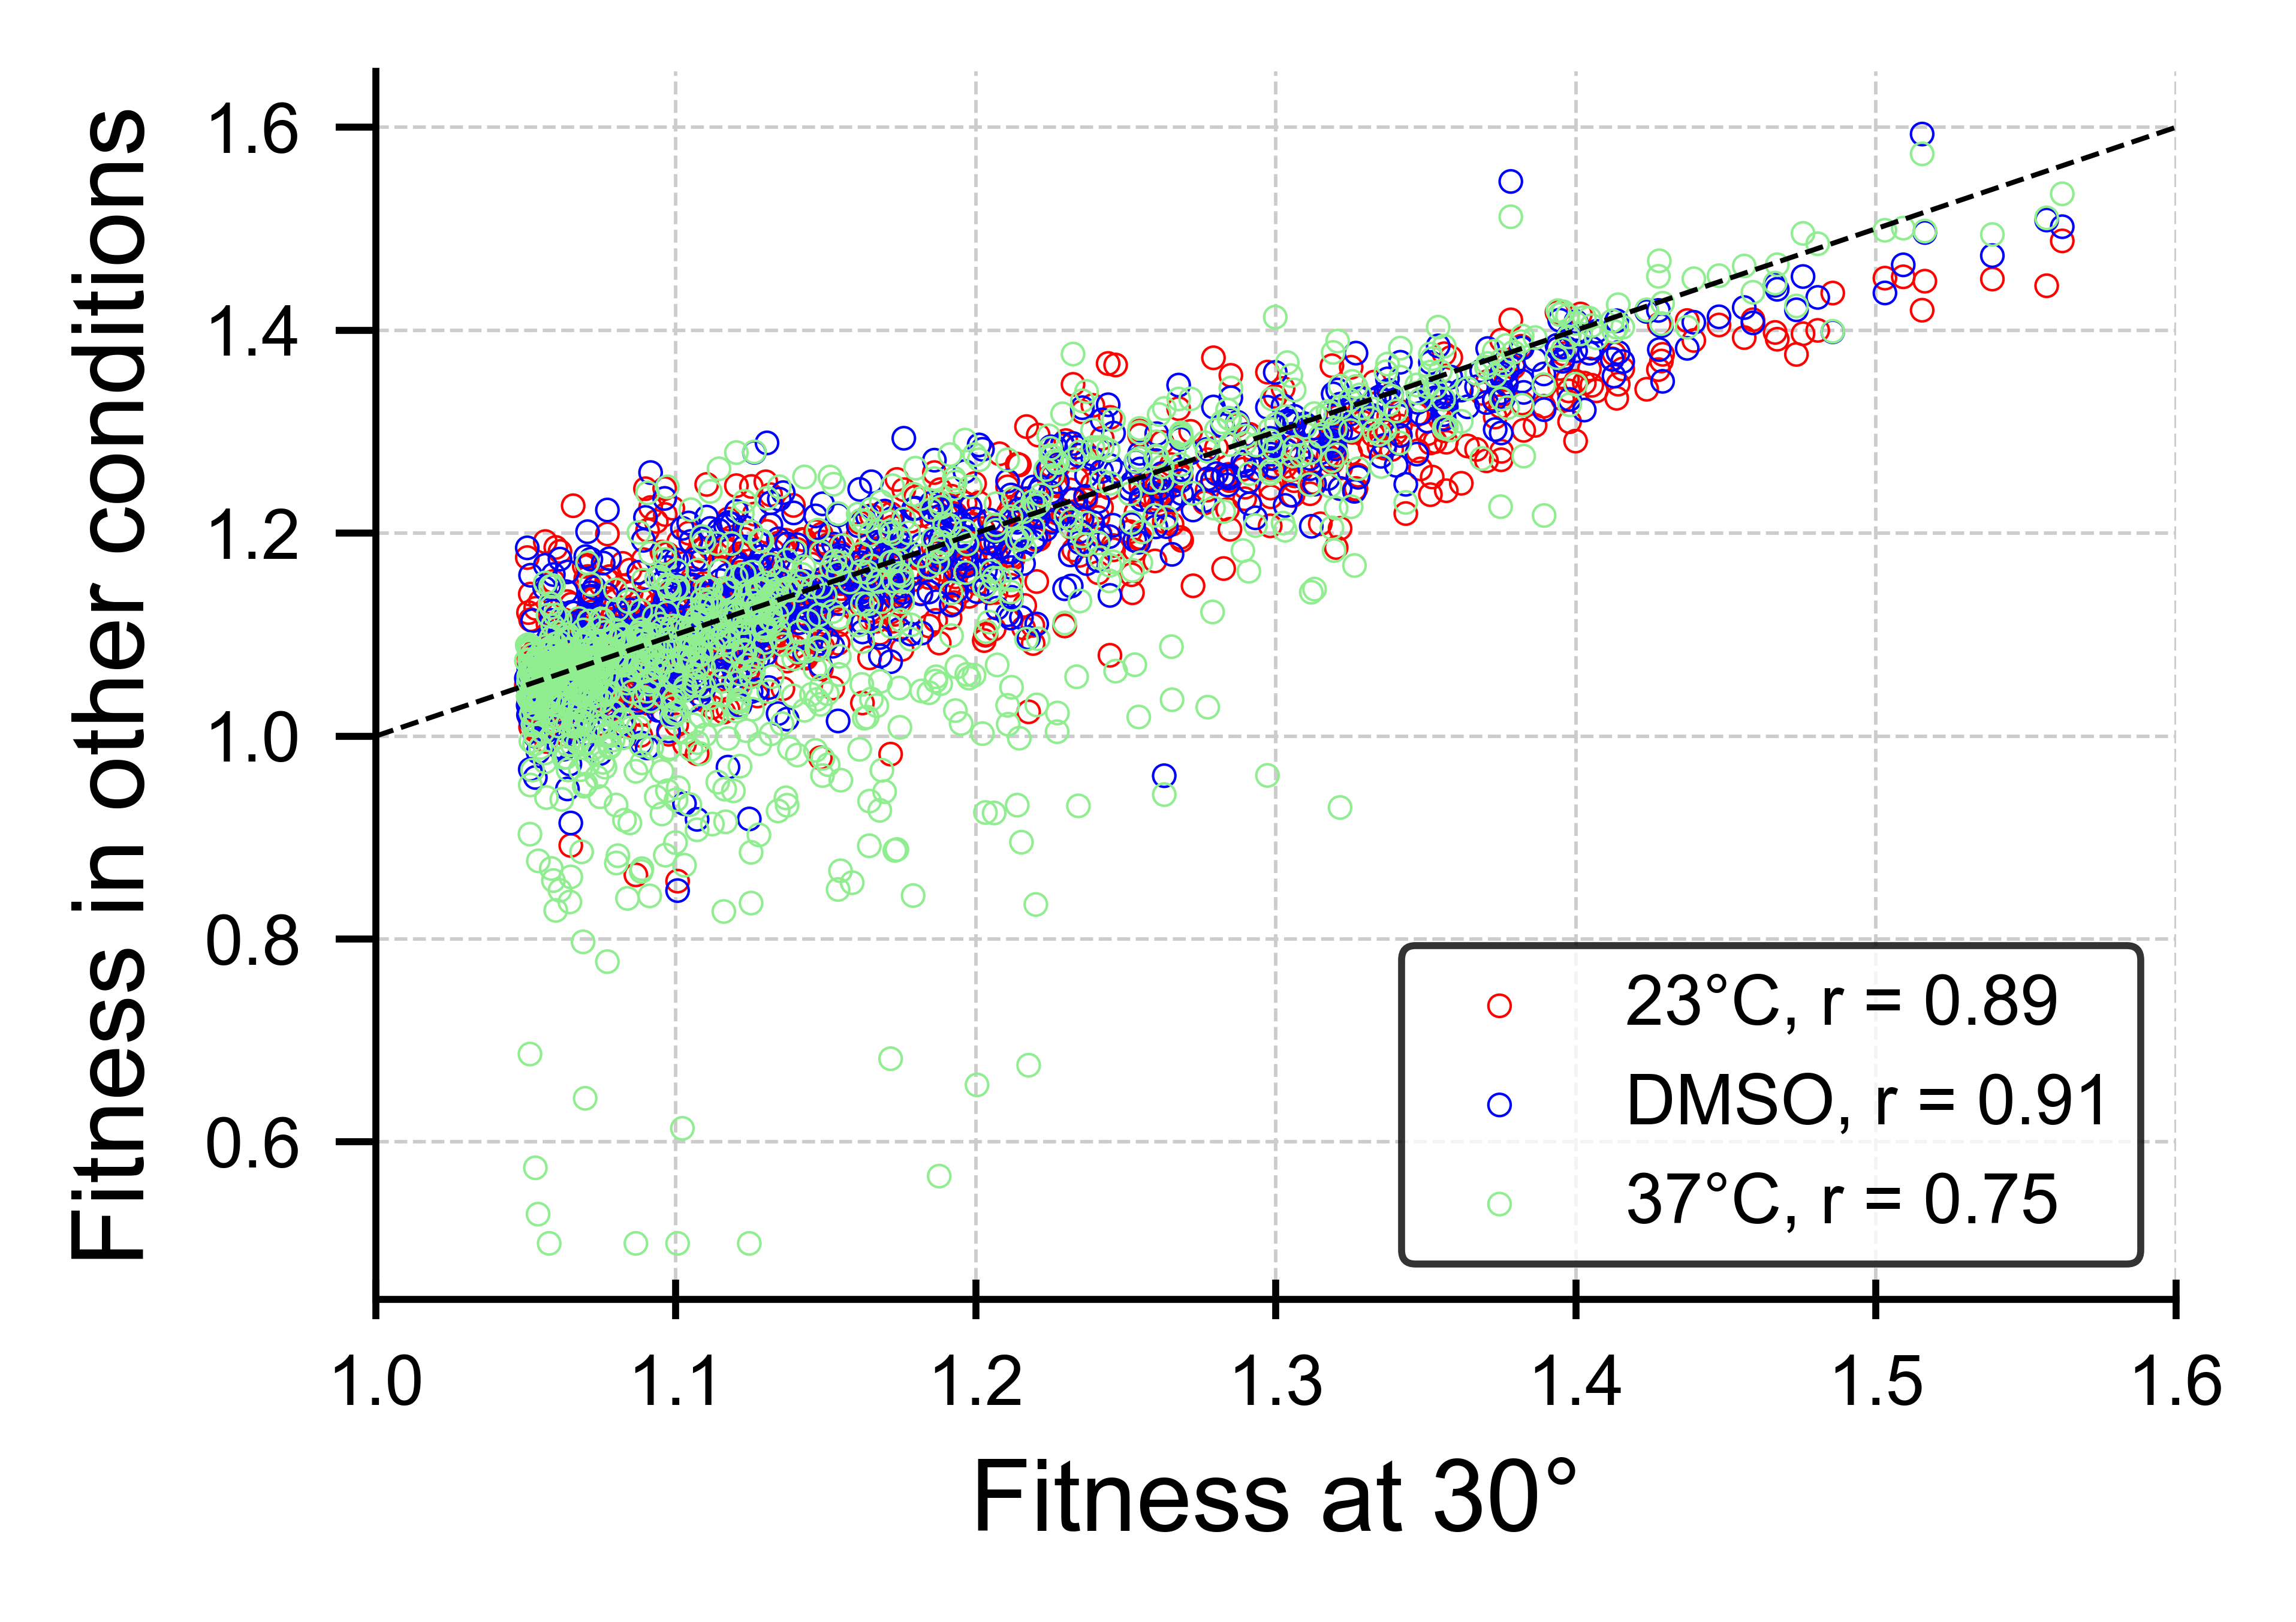

In [13]:
from scipy.stats.stats import pearsonr

fig = plt.figure(dpi= figure_dpi, facecolor=figure_facecolour, edgecolor=figure_edgecolour,figsize = fig_size)

t1 = 1.05
t2 = 1.6
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax2 = plt.subplot(subplot_only_one)
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit23'])
# plt.scatter(s = scatter_size, x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
#             y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit23'], label = '23'+u'\N{DEGREE SIGN}'+'C, r = %.2f, p = $10^{%d}$'%(r,np.log10(p+10**(-60))), color = 'r')
plt.scatter(s = 5,x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit23'], label = '23'+u'\N{DEGREE SIGN}'+'C, r = %.2f'%(r),
 edgecolors='r', facecolors='none', linewidth=0.25 )
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['FitDMSO'])
plt.scatter(s = 5,x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['FitDMSO'], label = 'DMSO, r = %.2f'%(r),  edgecolors='b', facecolors='none', linewidth=0.25 )
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit37'])
plt.scatter(s = 5,x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit37'], label = '37'+u'\N{DEGREE SIGN}'+'C, r = %.2f'%(r),edgecolors='#90EE90', facecolors='none', linewidth=0.25)

ref_line=linspace(1,1.6,2)
plt.plot(ref_line,ref_line,'k--',linewidth=0.5)
plt.xlim([ 1, 1.6])

#plt.title('30'+u'\N{DEGREE SIGN}'+'C Fitness in [{}, {}] against the others'.format(t1, t2), size = label_size)
ax2.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax2.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)

plt.xlabel("Fitness at 30"+u'\N{DEGREE SIGN}')
plt.ylabel("Fitness in other conditions")

ax2.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax2.set_axisbelow(True)

legend = ax2.legend(loc = 'lower right');  #prop = {'size': 6},
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)
frame.set_linewidth(width_global)
#tight_layout()

#fig.savefig('Fig_2A_high_fitness_open_symb_refline.png',dpi = 300)


# Correlation between fitness values across conditions - low fitness

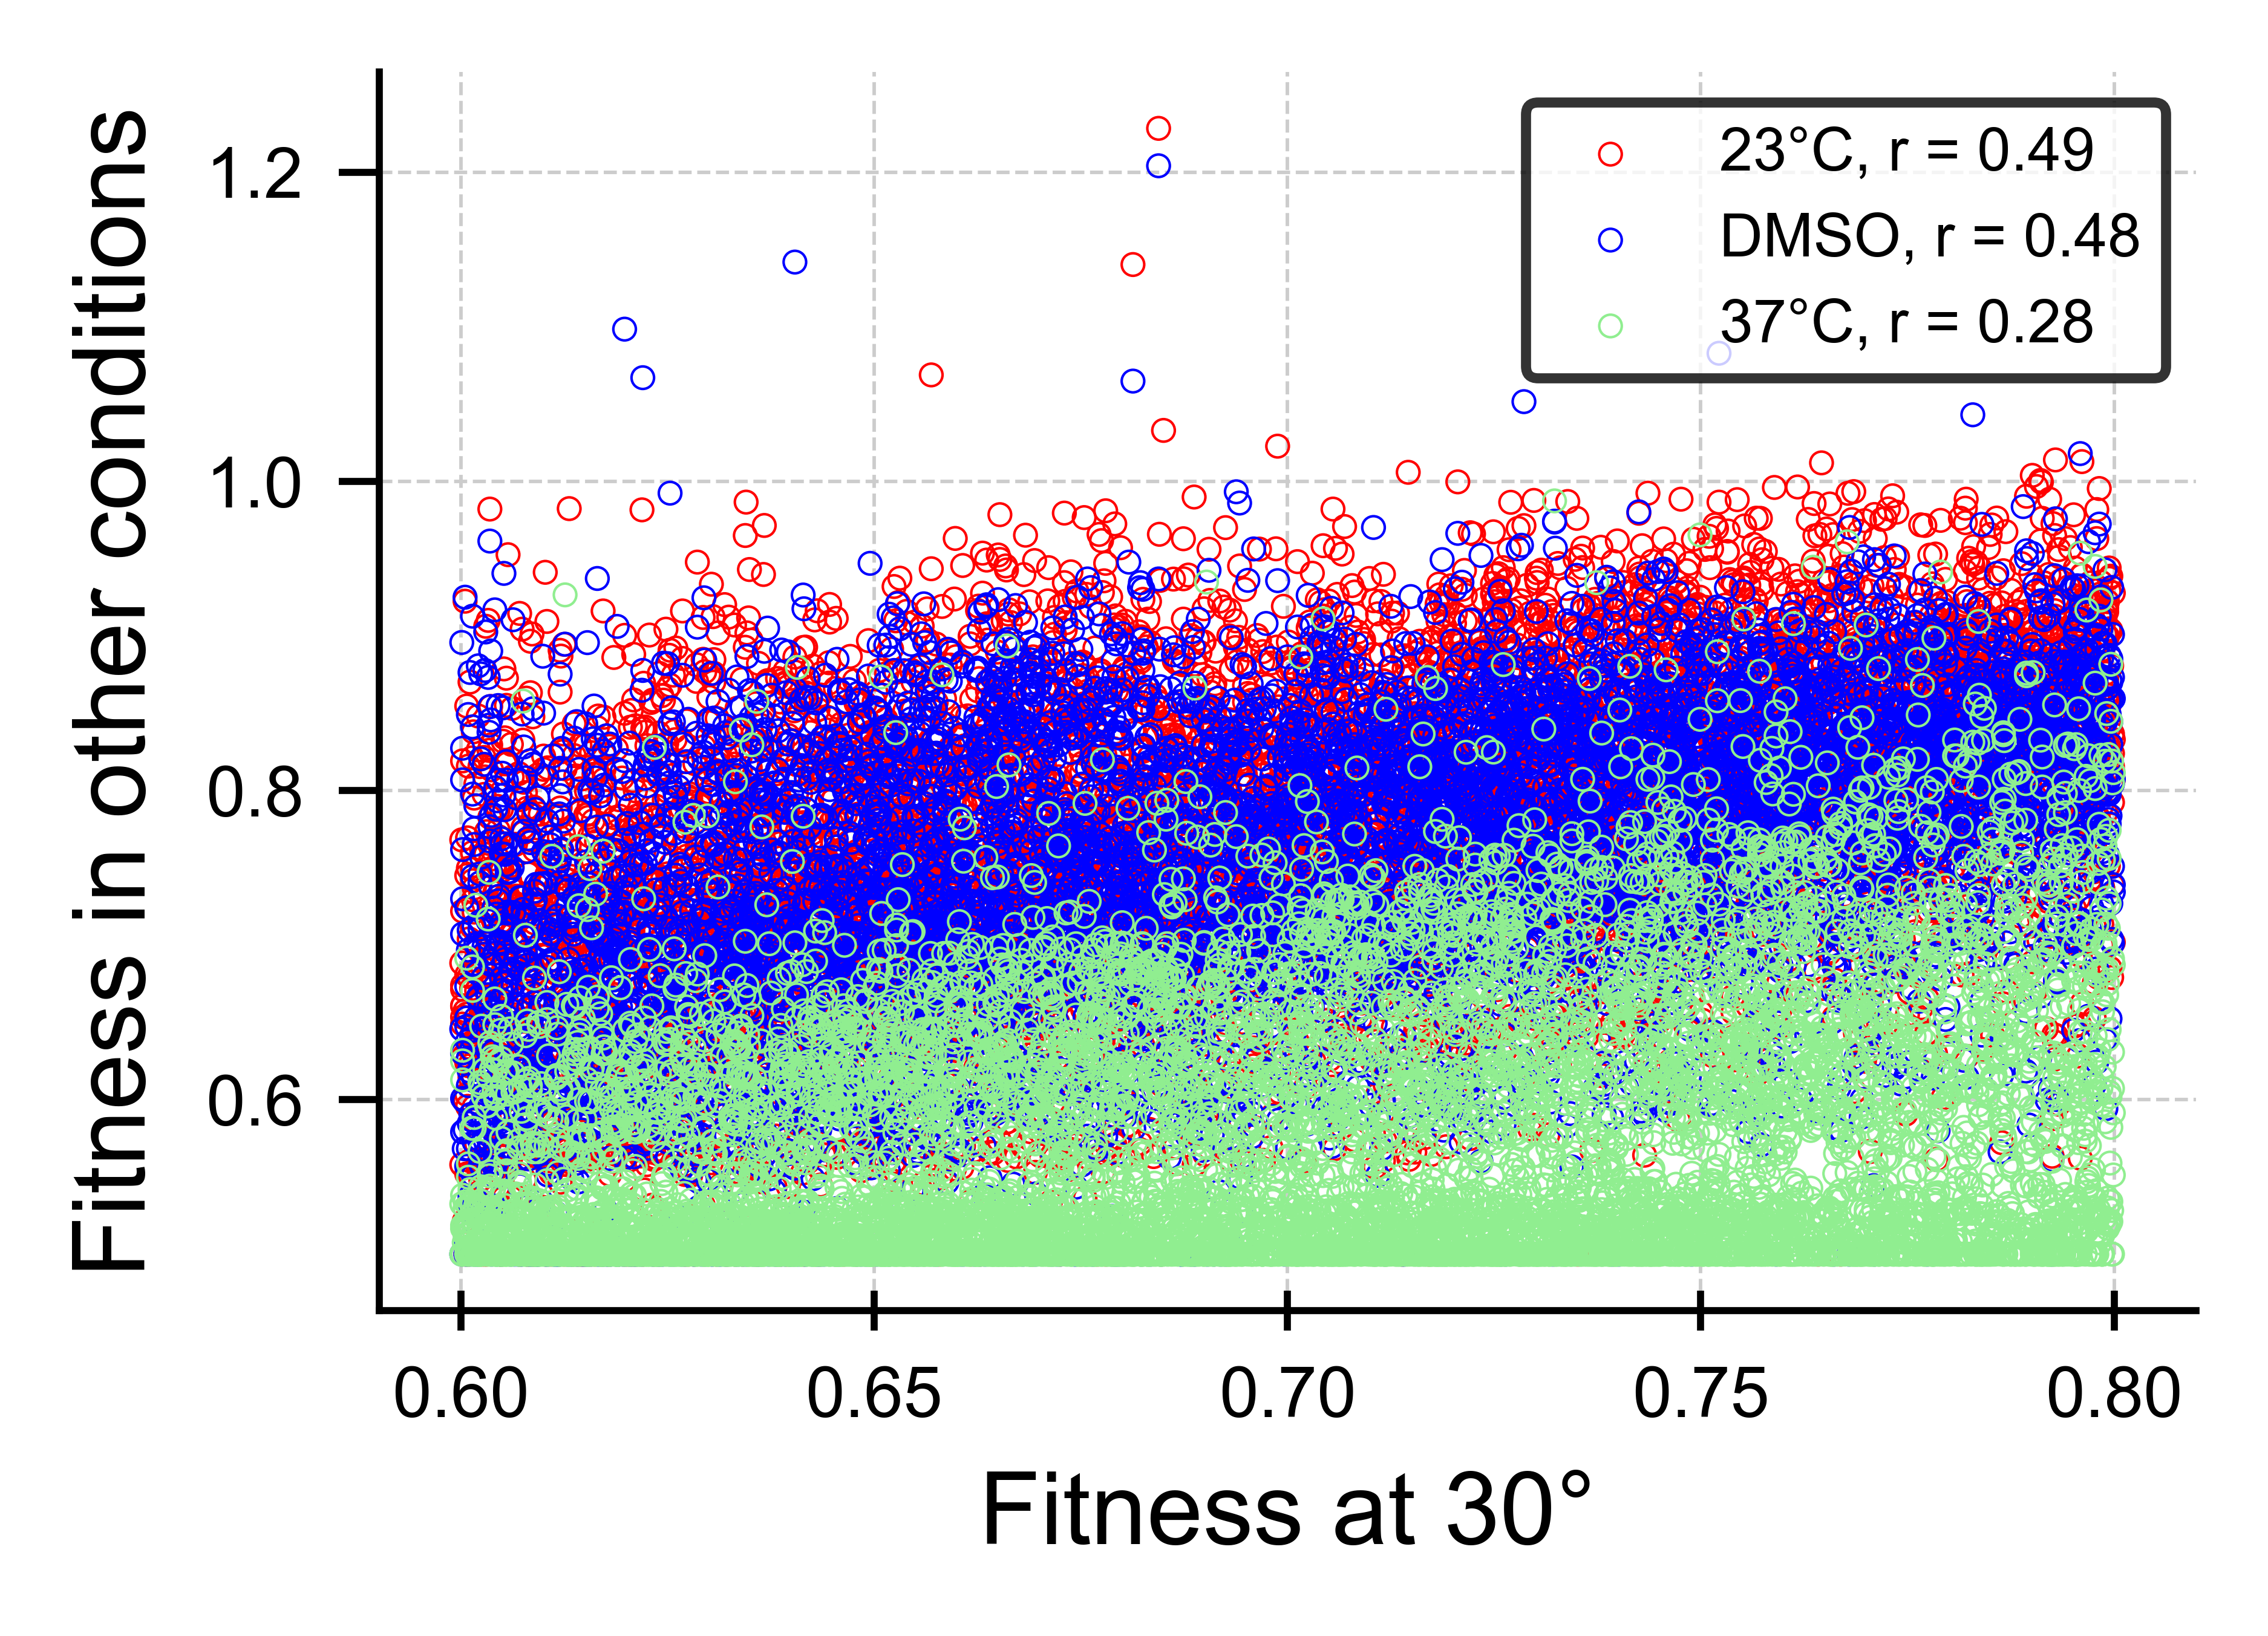

In [14]:
from scipy.stats.stats import pearsonr

fig = plt.figure(figsize=fig_size, dpi= figure_dpi, facecolor='w', edgecolor='k')

t1 = 0.6
t2 = 0.8
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax2 = plt.subplot(subplot_only_one)
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit23'])
plt.scatter(s = 5, x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit23'], label = '23\N{DEGREE SIGN}C, r = %.2f'%(r), edgecolors='r', facecolors='none',linewidth=0.25)
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['FitDMSO'])
plt.scatter(s = 5, x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['FitDMSO'], label = 'DMSO, r = %.2f'%(r), edgecolors = 'b', facecolors='none', linewidth=0.25)
r, p = pearsonr(data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit37'])
plt.scatter(s = 5, x = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit30'], 
            y = data[(data['Fit30']>t1) & (data['Fit30']<t2)]['Fit37'], label = '37\N{DEGREE SIGN}C, r = %.2f'%(r), edgecolors = '#90EE90', facecolors='none', linewidth=0.25)

#plt.title('30C Fitness in [{}, {}] against the others'.format(t1, t2))
ax2.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax2.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)

plt.xlabel("Fitness at 30"+u'\N{DEGREE SIGN}')
plt.ylabel("Fitness in other conditions")

ax2.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax2.set_axisbelow(True)

legend = ax2.legend(prop = {'size': 6})
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)

#fig.savefig('Fig_2B_low_fitness_open_symb.png', dpi = 300)



## geometric mean fitness relative to the WT 

In [15]:
GeometricMeanFitRel = (data['Fit23']*data['Fit30']*data['Fit37']*data['FitDMSO'])**0.25
print(GeometricMeanFitRel)
print(GeometricMeanFitRel.max())
print(GeometricMeanFitRel.min())


0        1.000000
1        0.996677
2        0.811826
3        0.996159
4        0.979866
           ...   
23279    0.526837
23280    0.517847
23281    0.506329
23282    0.500000
23283    0.500000
Length: 23284, dtype: float64
1.5240272788450706
0.5


1.5240272788450706
0.5


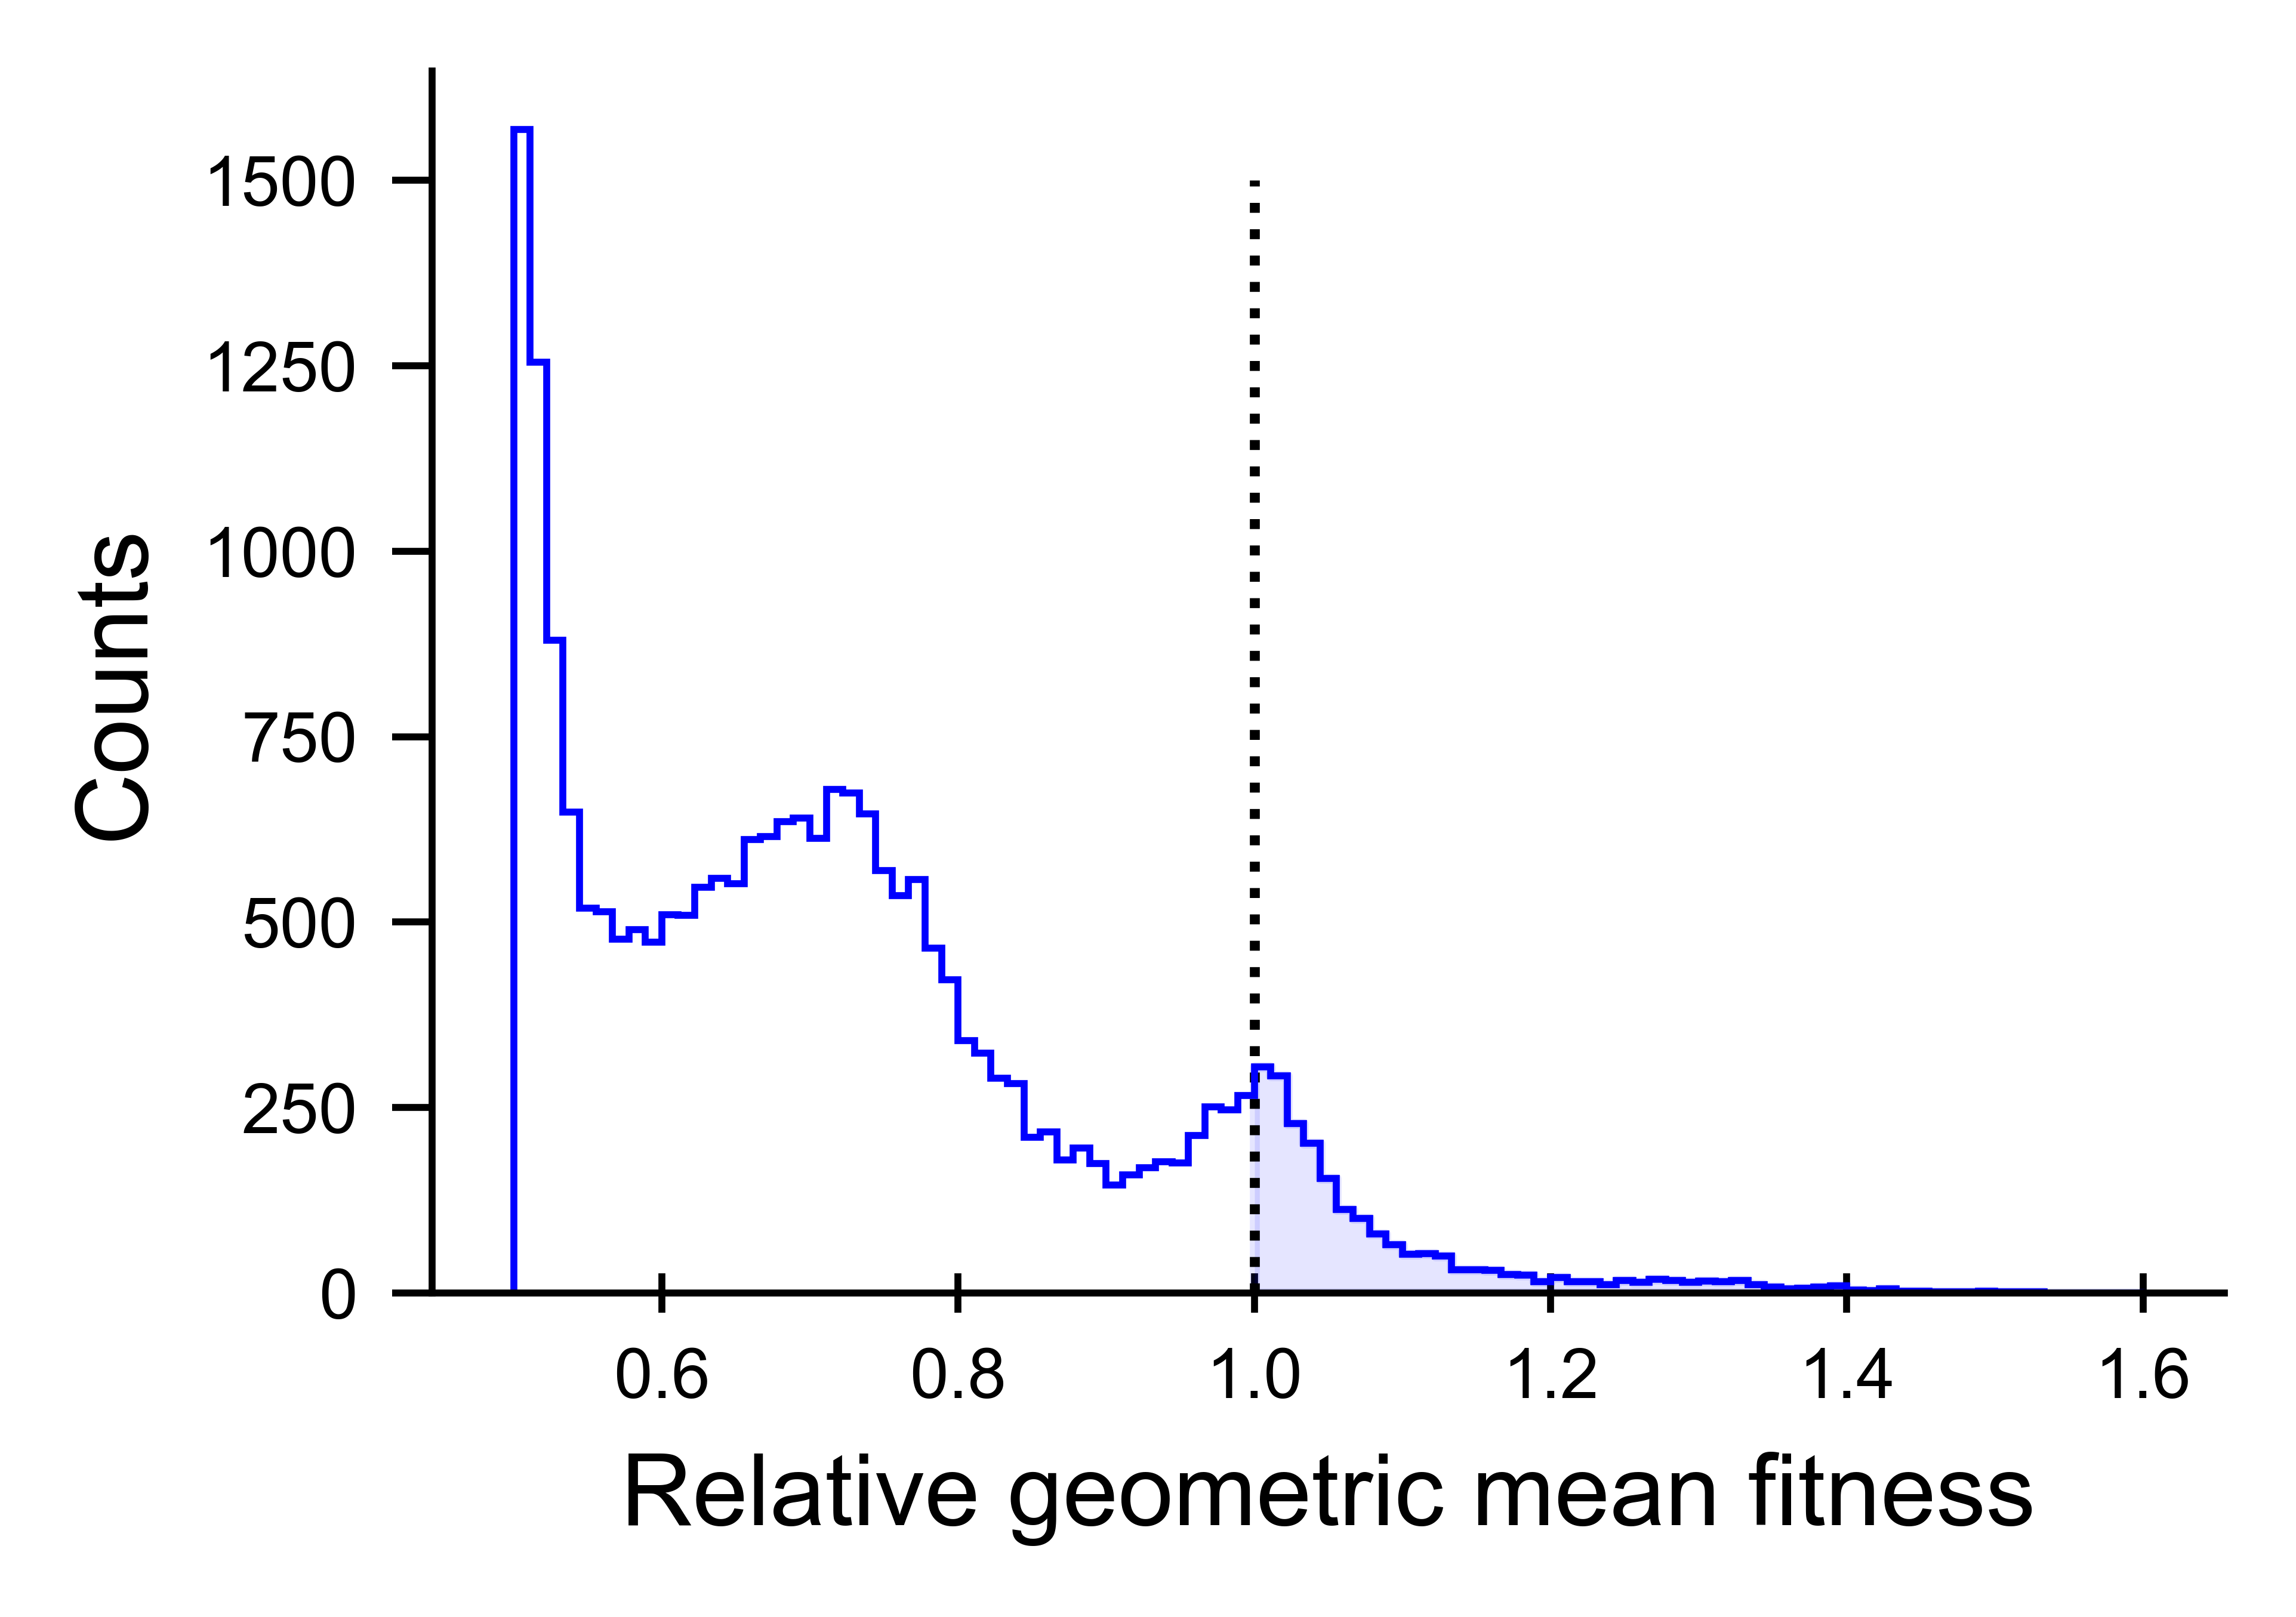

In [16]:
GeometricMeanFitRel = (data['Fit23']*data['Fit30']*data['Fit37']*data['FitDMSO'])**0.25

print(GeometricMeanFitRel.max())
print(GeometricMeanFitRel.min())

#plot histogram
fig = plt.figure(dpi = figure_dpi)
fig.set_size_inches(fig_size)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)

ax1 = fig.add_subplot(1,1,1)


GeometricMeanFitRel.hist(bins = np.linspace(0.5,1.6,100), color = 'b' , histtype='step', label = 'Geometric mean fitness', linewidth = width_global)
plt.vlines(GeometricMeanFitRel[0], 0, 1500, color = 'k', label = 'Geometric mean WT',  linewidth = 1.0, linestyles=':')

counts,bin_edges = np.histogram(GeometricMeanFitRel, bins=linspace(0.5,1.6,100)) 
x = bin_edges[bin_edges>=1.0]
x = np.insert(x,0,1)
counts = np.insert(counts,0,counts[-len(x)])
plt.fill_between(x, counts[-len(x):], step='pre', color = 'b', alpha=0.1)

ax1.set_xlabel('Relative geometric mean fitness',  fontdict = font_dict_axis)
ax1.set_ylabel('Counts',  fontdict = font_dict_axis)
ax1.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax1.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)


ax1.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
ax1.set_axisbelow(True)


handle2 = matplotlib.lines.Line2D([], [], c='b')
handle4 = matplotlib.lines.Line2D([], [], c='r', linestyle = '--')

#fig.savefig('fill_relative_geometric_mean_fitness_all_counts_corrected.png', dpi = figure_dpi)

## Fig. 1D - geometric mean fitness of N1-N4

<ipython-input-17-62d7121e8642>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


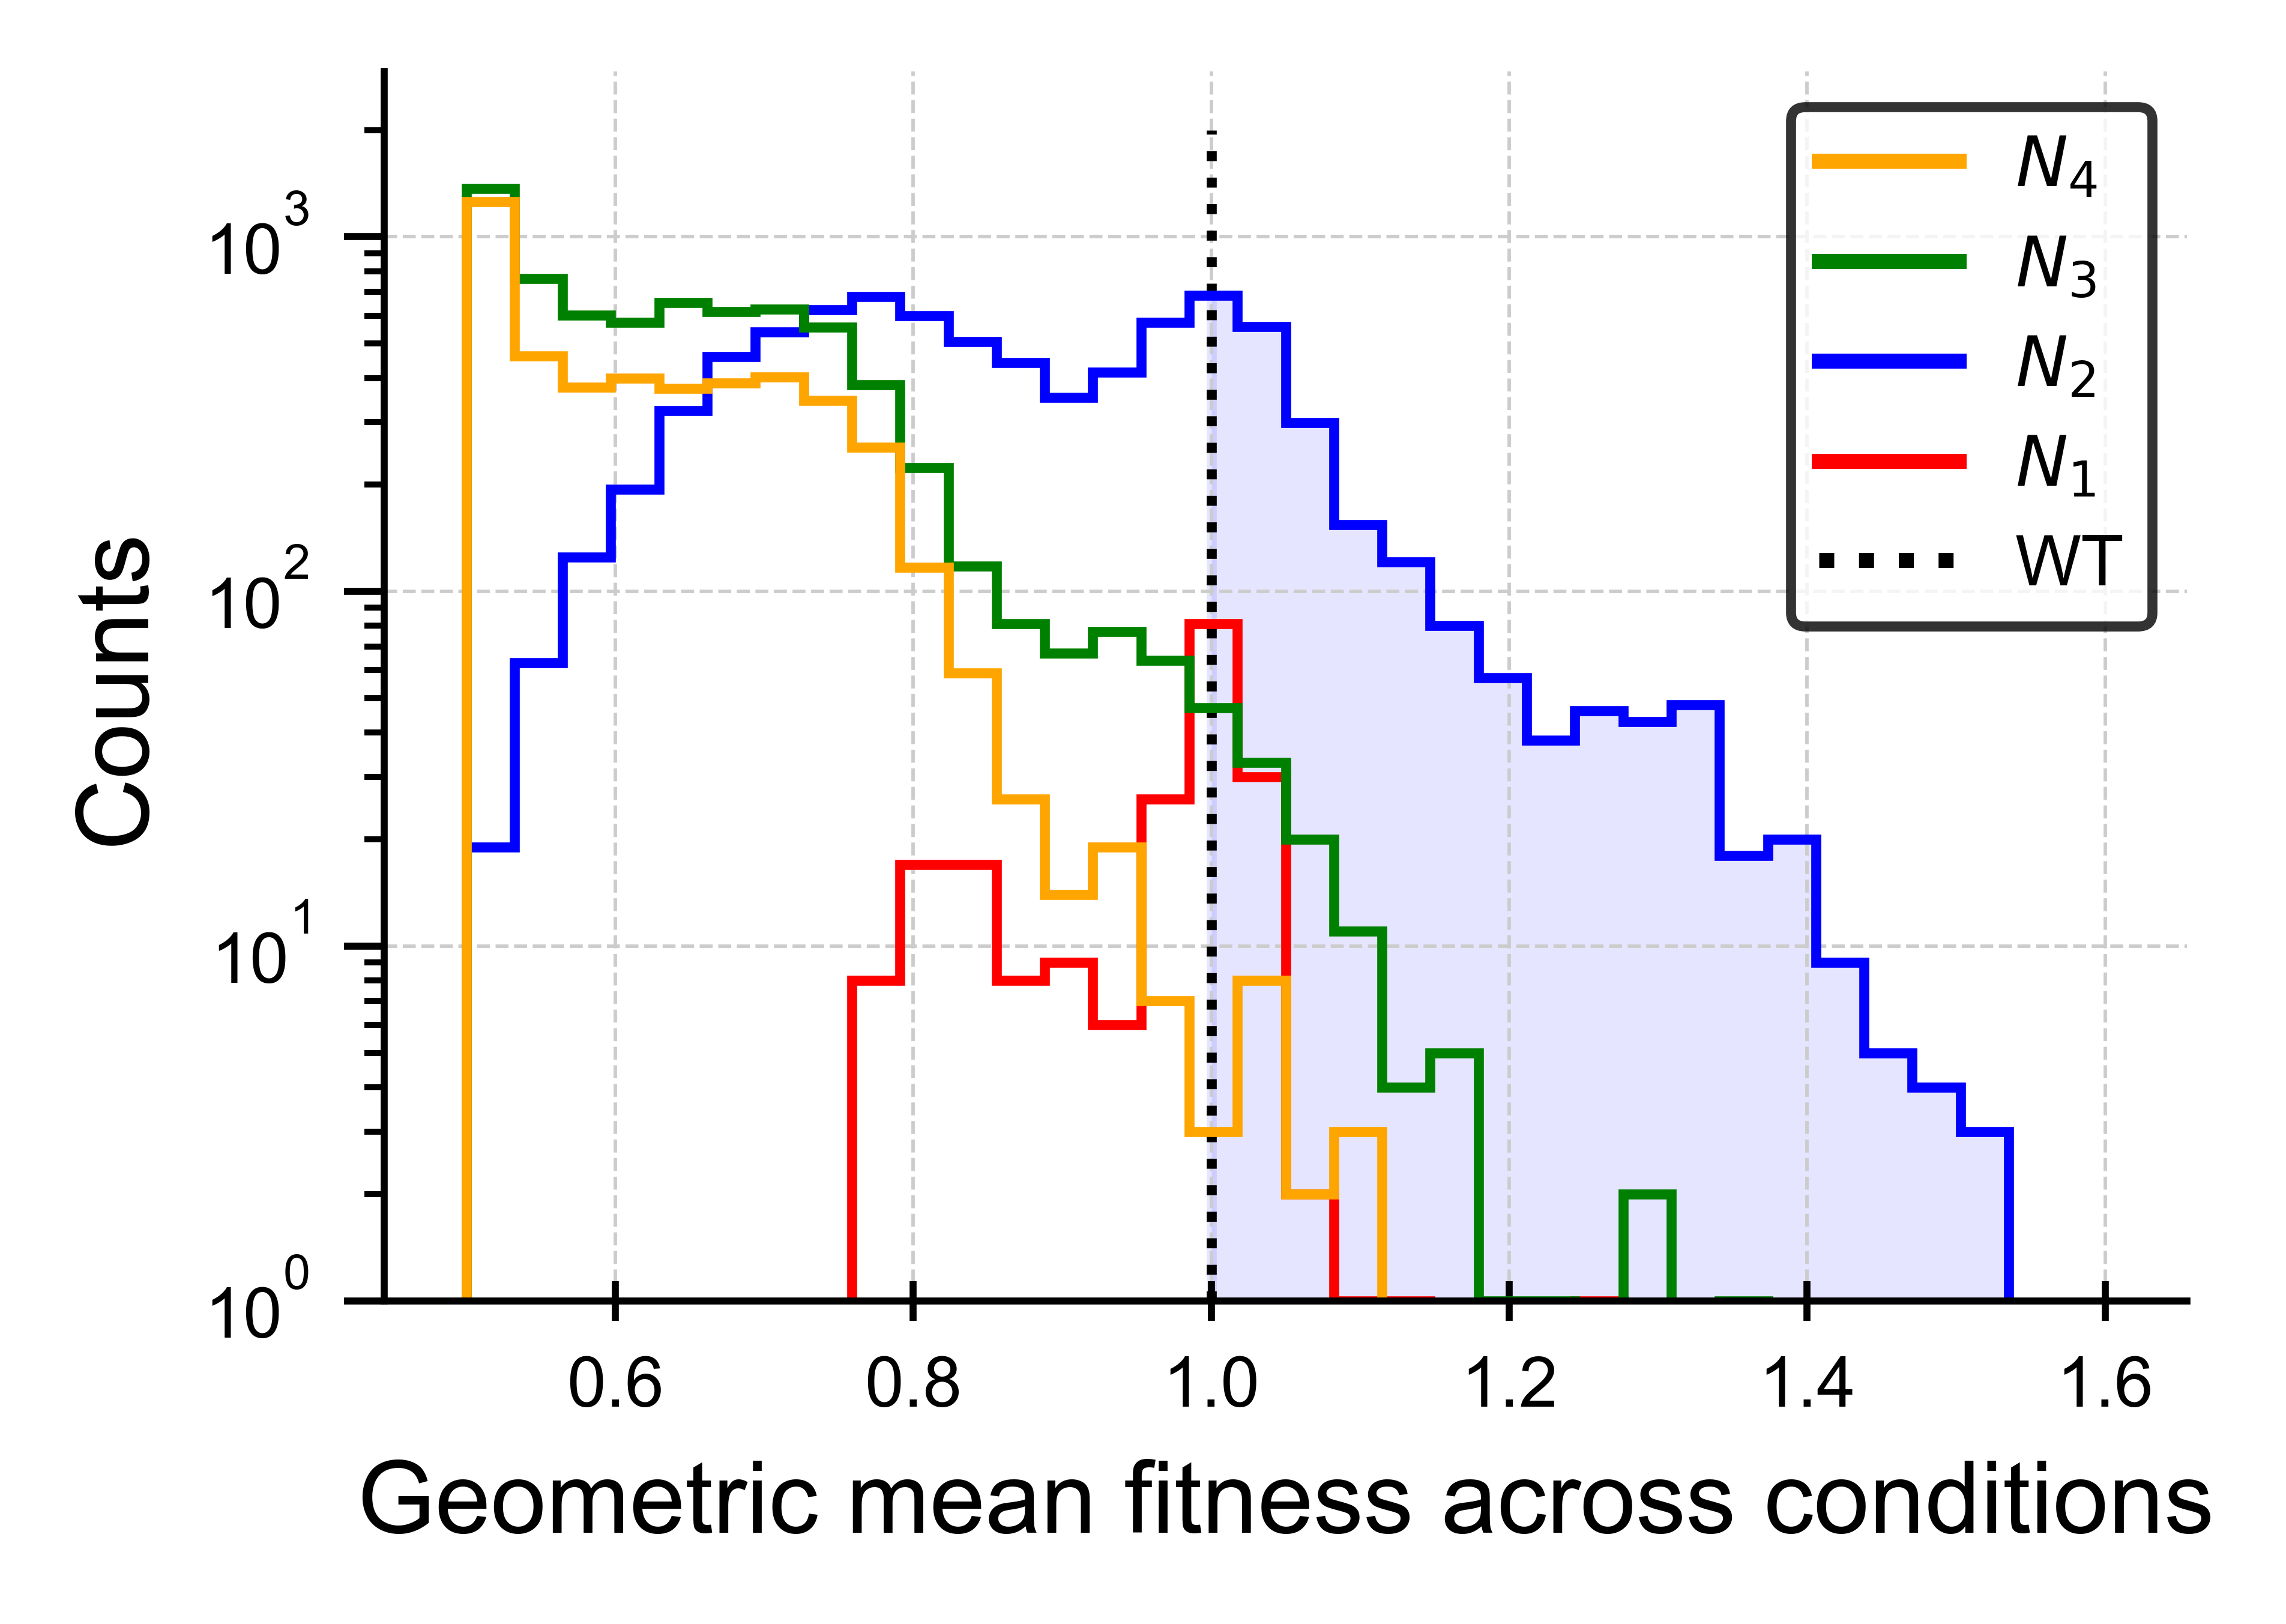

In [17]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)
lin = np.linspace(0.5,1.6,150)

fits = ['Fit30']

fig.set_dpi(figure_dpi)
fig.set_facecolor('w')
fig.set_edgecolor('k')
fig.set_size_inches(fig_size)


ax = plt.subplot(111)
GeometricMeanFitRel = (data['Fit23']*data['Fit30']*data['Fit37']*data['FitDMSO'])**0.25
plt.hist(GeometricMeanFitRel[data['Num']==1],bins=linspace(0.5,1.6,35), log = True, histtype='step', color = 'r', label='$N_1$')
plt.hist(GeometricMeanFitRel[data['Num']==2],bins=linspace(0.5,1.6,35), log = True, histtype='step', color = 'b', label='$N_2$')
plt.hist(GeometricMeanFitRel[data['Num']==3],bins=linspace(0.5,1.6,35), log = True, histtype='step', color = 'g', label='$N_3$')
plt.hist(GeometricMeanFitRel[data['Num']==4],bins=linspace(0.5,1.6,35), log = True, histtype='step', color = 'orange', label='$N_4$')
plt.vlines(GeometricMeanFitRel[0], 1, 2000, color = 'k', linewidth = 1.0, linestyles=':') #, label = 'Geometric mean WT')

plt.gca().set_ylim(bottom=1)
 
plt.xlabel('Geometric mean fitness across conditions',  fontdict = font_dict_axis); #{'fontsize': 10, 'fontweight' : 400})
plt.ylabel('Counts',  fontdict = font_dict_axis); #{'fontsize': 10, 'fontweight' : 400})    
counts,bin_edges = np.histogram(GeometricMeanFitRel[data['Num']==2], bins=linspace(0.5,1.6,35)) 
x = bin_edges[bin_edges>=1.0]
x = np.insert(x,0,1)
counts = np.insert(counts,0,counts[-len(x)])
plt.fill_between(x, counts[-len(x):], step='pre', color = 'b', alpha=0.1)

handle1 = matplotlib.lines.Line2D([], [], c='r')
handle2 = matplotlib.lines.Line2D([], [], c='b')
handle3 = matplotlib.lines.Line2D([], [], c='g')
handle4 = matplotlib.lines.Line2D([], [], c='orange')
handle5 = matplotlib.lines.Line2D([], [], c='k',linestyle = ':')


handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=[handle4,handle3,handle2,handle1,handle5], labels=['$N_4$','$N_3$','$N_2$','$N_1$','WT'],facecolor = legend_facecolour, edgecolor = legend_edgecolour)
frame.set_linewidth(width_global)
    
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)

    
#fig.savefig('Fig_1d_fill_N1_to_N4_geo_mean_fitness_rel_color_switch.png', dpi = figure_dpi)

## How many fitter-than-WT variants are there at each mutational neighborhood?

In [18]:
# number of genotypes with higher geometric mean fitness than the WT
print(GeometricMeanFitRel[0])
#print(GeometricMeanFit>GeometricMeanFit[0])
#print(GeometricMeanFit[GeometricMeanFit>GeometricMeanFit[0]])
Delta = 0.0228
GFN1 = GeometricMeanFitRel[data['Num']==1]
print(len(GFN1[GFN1>1+Delta]))
print(len(GFN1[GFN1<1-Delta]))

GFN2 = GeometricMeanFitRel[data['Num']==2]
#print(GFN2)
print(len(GFN2[GFN2>1+Delta]))
GFN3 = GeometricMeanFitRel[data['Num']==3]
#print(GFN3)
#print(GFN3[GFN3>1.05])
print(len(GFN3[GFN3>1+Delta]))
print(len(GFN3))
GFN4 = GeometricMeanFitRel[data['Num']==4]
#print(GFN4)
print(len(GFN4[GFN4>1+Delta]))
print(len(GFN4[GFN4>1+Delta]))
#GFN_high = GeometricMeanFitRel[data['Num']>4]
#print(len(GFN_high))
207+8101+6891+4514+3570

1.0
24
77
1395
71
6891
12
12


23283

## Fitness values at 30C in different mutational neighborhoods

<ipython-input-19-6b9b8999861d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


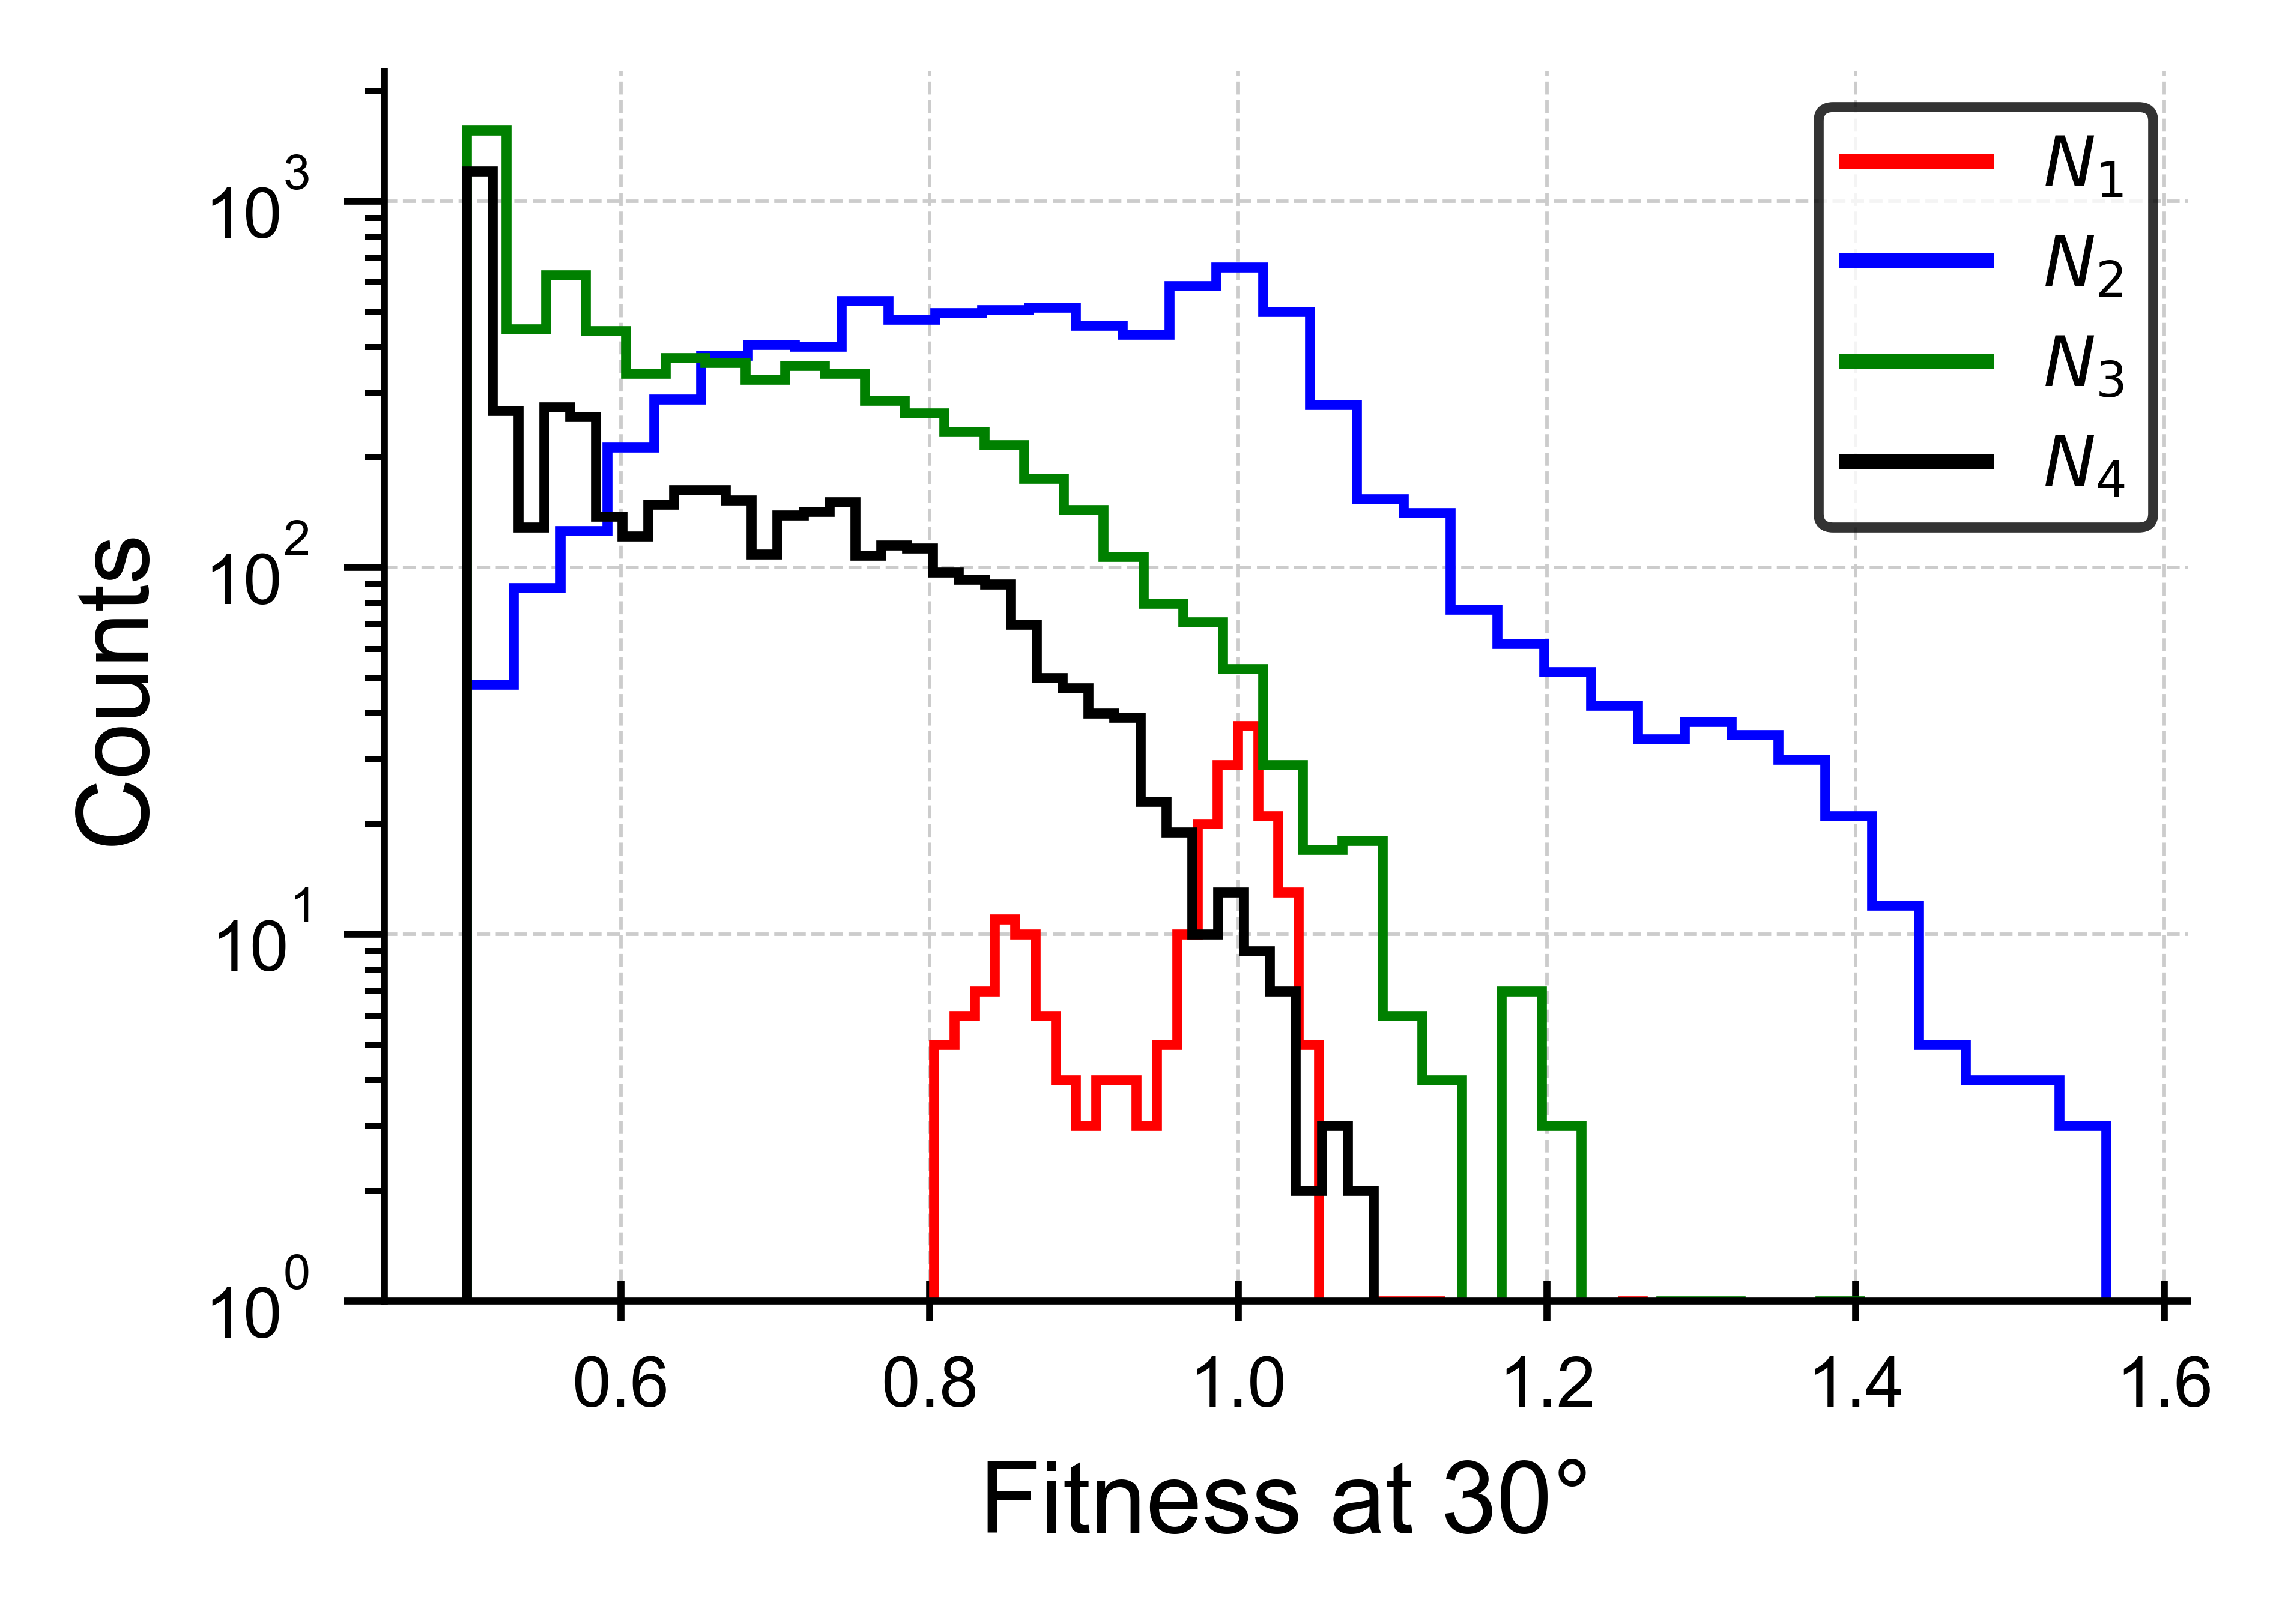

In [19]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)
# plt.figure(figsize=fig_size, dpi= figure_dpi, facecolor='w', edgecolor='k')
# plt.figure(figsize=(16,10))
#ax = plt.subplot(1,1,1)
lin = np.linspace(0.5,1.6,150)

fits = ['Fit30']

fig.set_dpi(figure_dpi)
fig.set_facecolor('w')
fig.set_edgecolor('k')
fig.set_size_inches(fig_size)


for i, fit in enumerate(fits):
    ax = plt.subplot(111)
    plt.hist(data[data['Num']==1][fit],bins=35, log = True, histtype='step', color = 'r', label='$N_1$')
    plt.hist(data[data['Num']==2][fit],bins=35, log = True, histtype='step', color = 'b', label='$N_2$')
    plt.hist(data[data['Num']==3][fit],bins=35, log = True, histtype='step', color = 'g', label='$N_3$')
    plt.hist(data[data['Num']==4][fit],bins=35, log = True, histtype='step', color = 'k', label='$N_4$')
    plt.gca().set_ylim(bottom=1)
    #plt.title('tRNA Fitness histogram breakdown in {}'.format(fit))
plt.xlabel("Fitness at 30"+u'\N{DEGREE SIGN}',  fontdict = font_dict_axis); #{'fontsize': 10, 'fontweight' : 400})
plt.ylabel('Counts',  fontdict = font_dict_axis); #{'fontsize': 10, 'fontweight' : 400})    
#plt.ylabel('Counts')
    

plt.legend()
    # Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]
plt.legend(handles=new_handles, labels=labels,facecolor = legend_facecolour, edgecolor = legend_edgecolour)
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)

    
#fig.savefig('Fig_2b_N1_to_N4_fitness_30C.png', dpi = figure_dpi)

## How many neighbors do genotypes have?##

In [20]:
AA = data[data['1-neig']==4]['1-neig']
print(AA)
# there are 6905 genotypes with zero 1-neighbors!
# 3460 with only 1 1-neighbor
# 2539 with 2 1-neighbors
# 2861 with 3 1-neighbors
# 1904 with 4 1-neighbors
# only 5615 have at least 5 neighbors (for which steepness was calculated).

209      4.0
216      4.0
218      4.0
228      4.0
229      4.0
        ... 
18052    4.0
20113    4.0
20760    4.0
21292    4.0
22574    4.0
Name: 1-neig, Length: 1904, dtype: float64


# SI Figures

FileNotFoundError: [Errno 2] No such file or directory: 'Fig_3_fragility_Matlab_data\\fragility_NK_5_v7.mat'

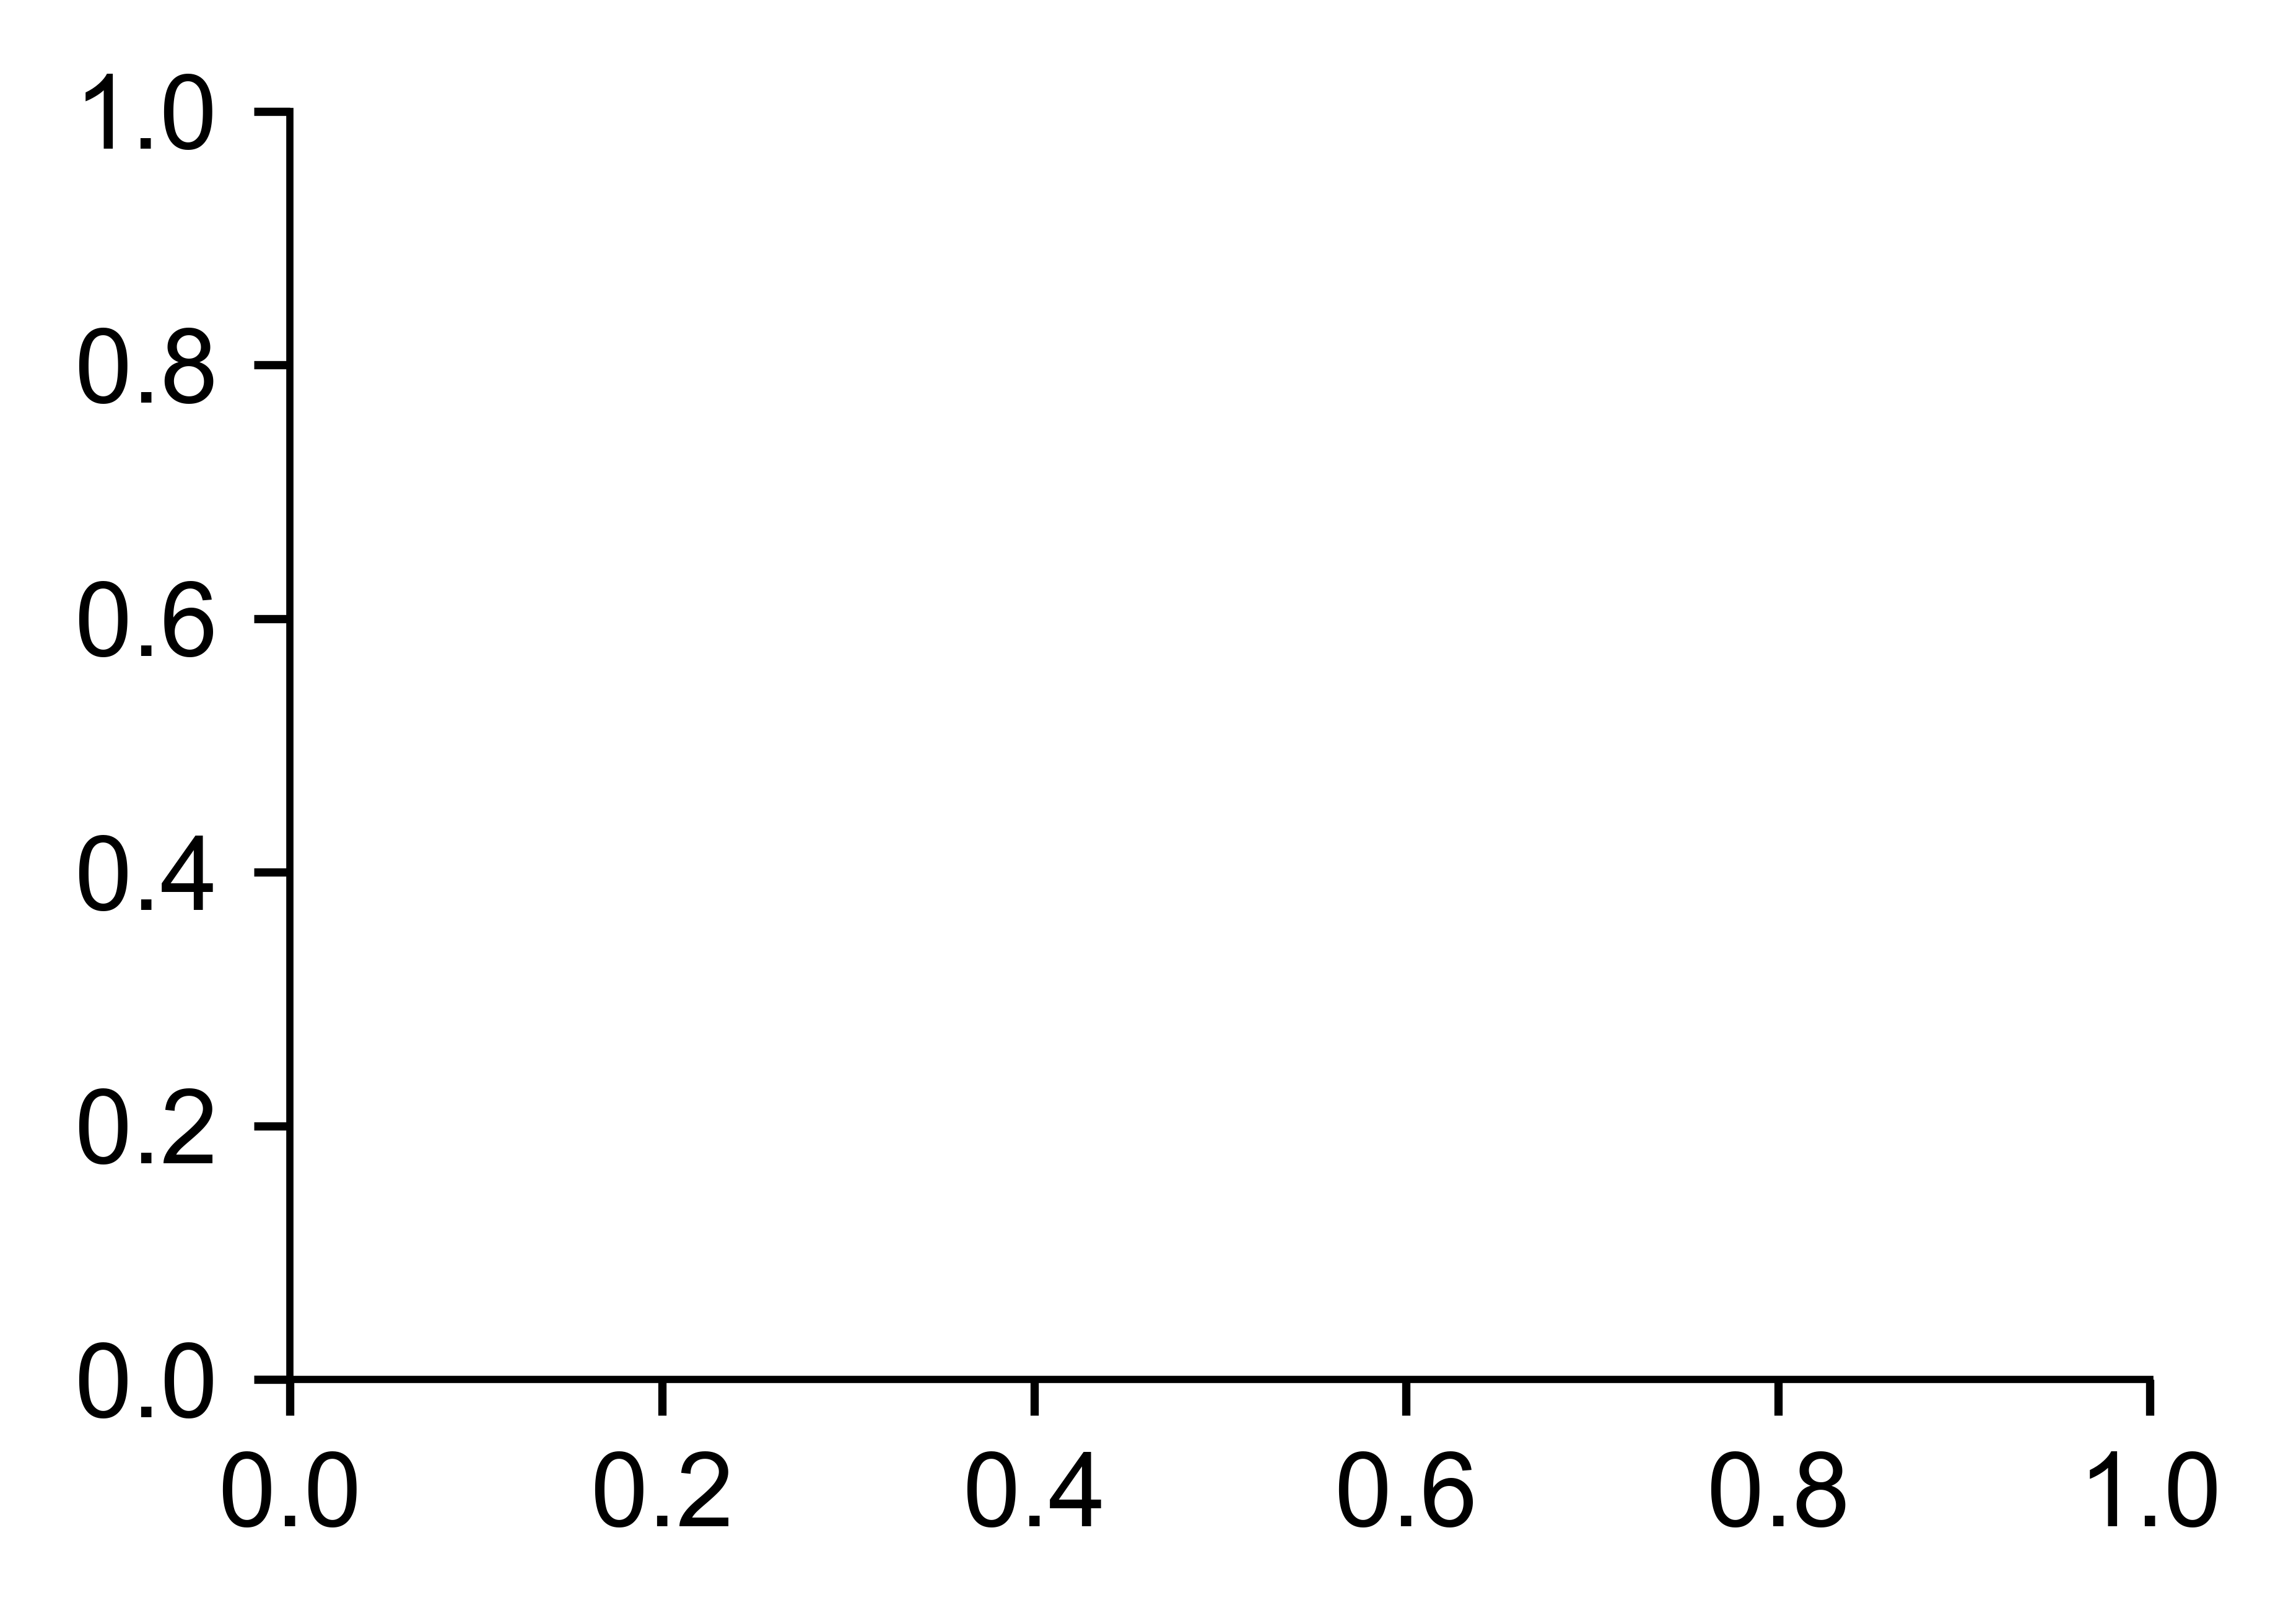

In [21]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

import scipy.io
#mat = scipy.io.loadmat('Fig_4_Data_Matlab\Fig4C_K_6.mat')
mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_NK_5_v7.mat')
fitness_hist_4C_K_6 = mat['Fitness'][0]
plt.hist(fitness_hist_4C_K_6, bins = 50, histtype='step', label = 'K=5', color = 'b')
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
plt.xlabel('Fitness', fontdict = font_dict_axis)
plt.ylabel('Counts', fontdict = font_dict_axis)
plt.title('N = 14, K = 5', fontdict = font_dict_axis)
#plt.title('histogram of steepness values when considering only far / close 1 neig. of each variant ')

#plt.savefig('Fig_3A_Fitness_K_5.png', dpi = figure_dpi)

FileNotFoundError: [Errno 2] No such file or directory: 'Fig_3_fragility_Matlab_data\\fragility_NK_13_v7.mat'

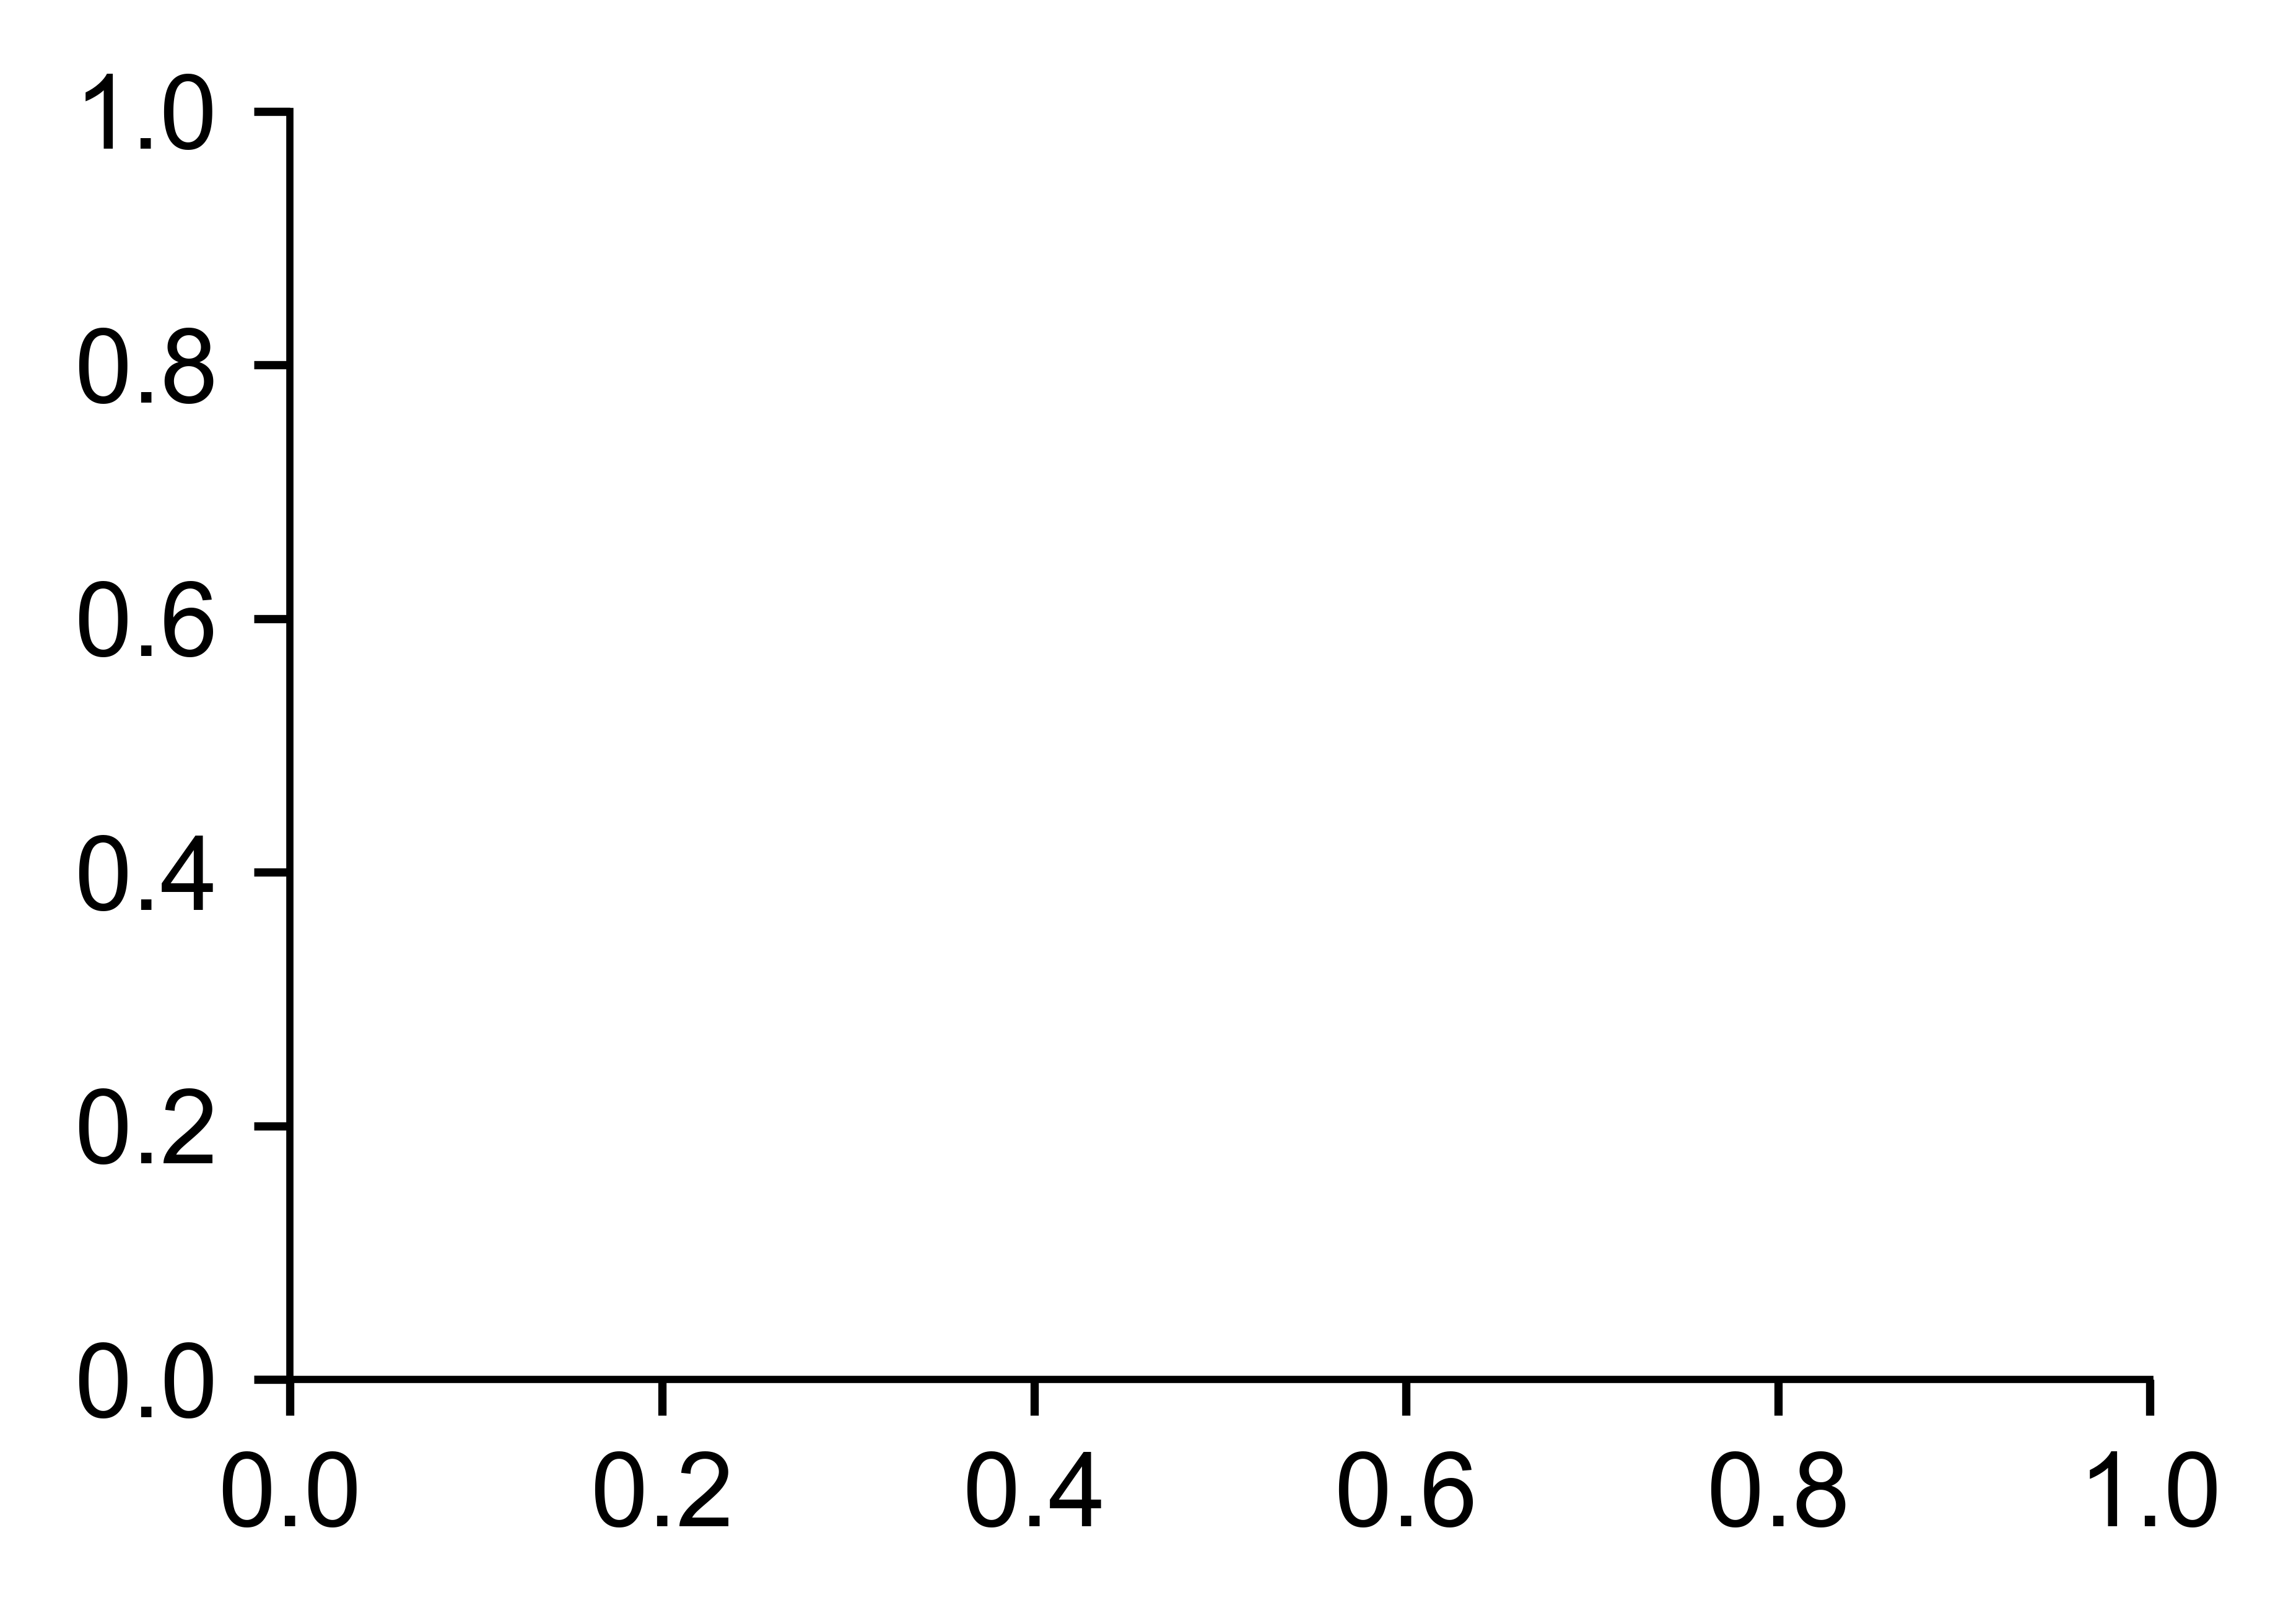

In [22]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

import scipy.io
#mat = scipy.io.loadmat('Fig_4_Data_Matlab\Fig4D_K_14.mat')
mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_NK_13_v7.mat')
print(type(mat))
fitness_hist_4D_K_14 = mat['Fitness'][0]
plt.hist(fitness_hist_4D_K_14, bins = 50, histtype='step', label = 'K=13', color = 'b')
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
plt.xlabel('Fitness', fontdict = font_dict_axis)
plt.ylabel('Counts', fontdict = font_dict_axis)
plt.title('N = 14, K = 13', fontdict = font_dict_axis)
#plt.title('histogram of steepness values when considering only far / close 1 neig. of each variant ')

#plt.savefig('Fig_3B_Fitness_K_13.png', dpi = figure_dpi)

# mutational fragility - new figures#

FileNotFoundError: [Errno 2] No such file or directory: 'Fig_3_fragility_Matlab_data\\fragility_NK_5_v7.mat'

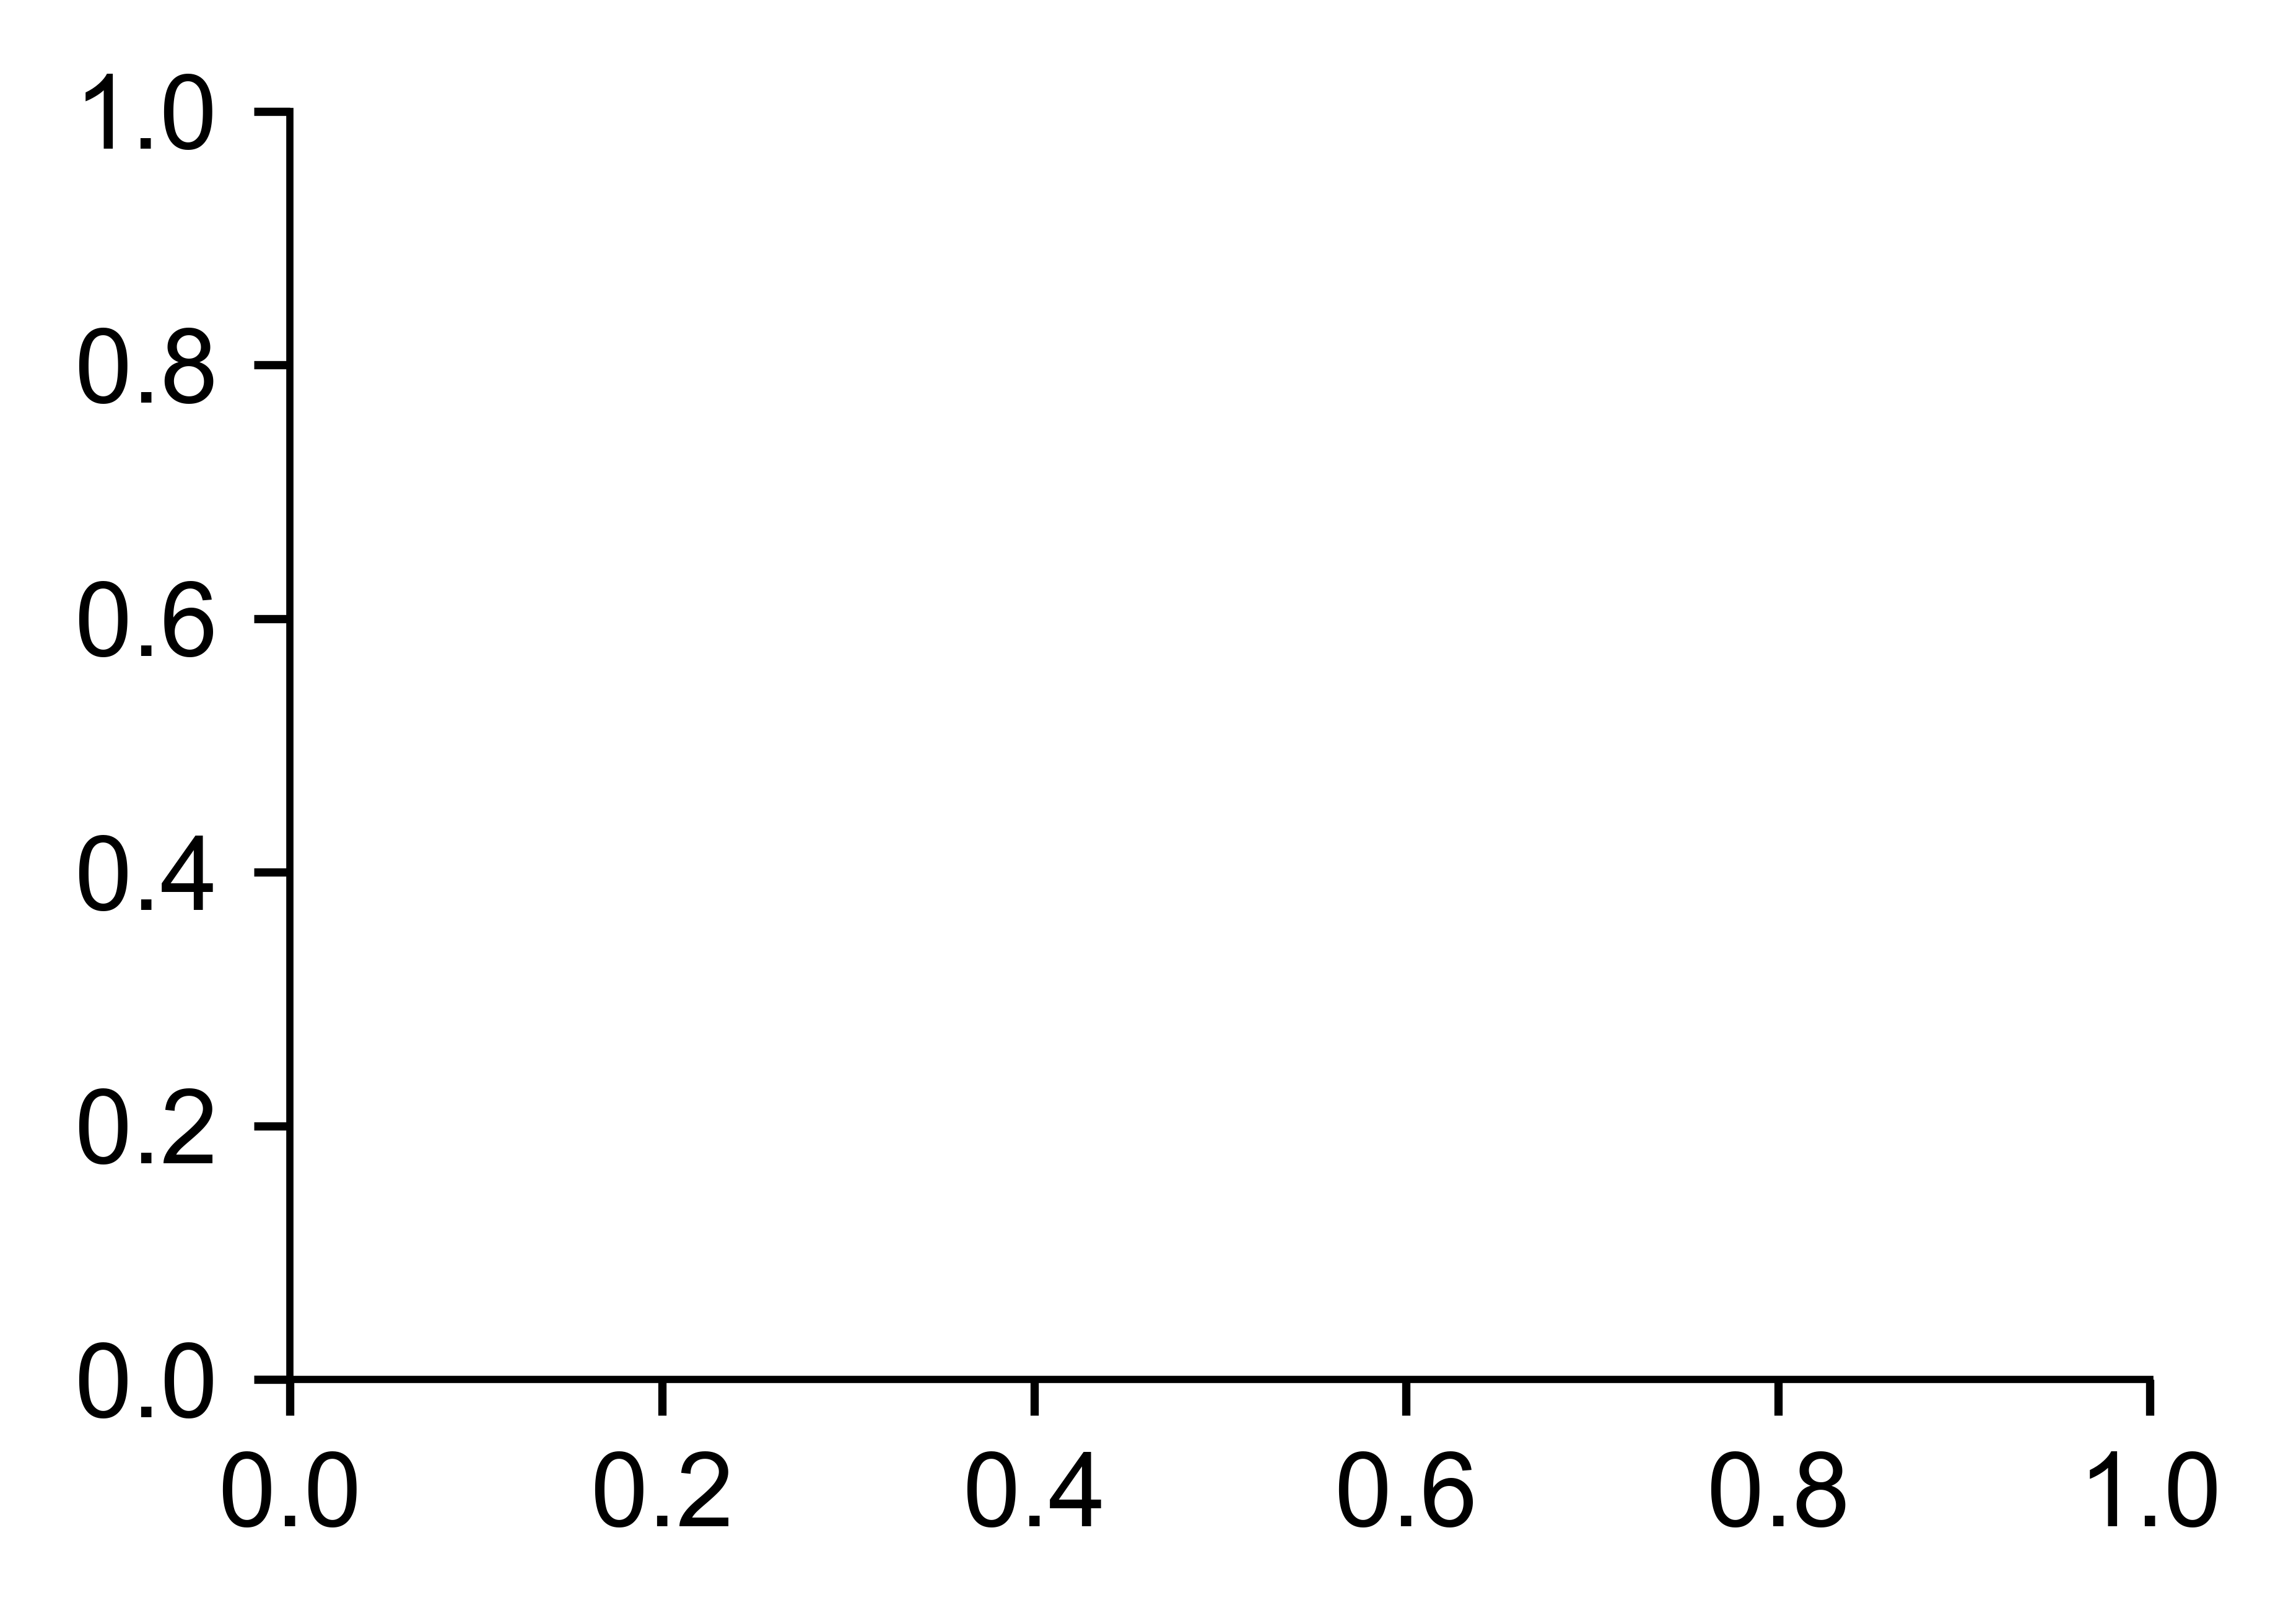

In [23]:
import os
import scipy.io
#from mat4py import loadmat # -  this did not work for me.
# two things to keep in mind: save mat files with flag -v7 - it does not work with more advanced versions.
# \f \t and some other combinations could be recognized as commands. Use \\ to avoid that.


fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)
#mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_fig_data_v7.mat')
mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_NK_5_v7.mat')
#print(mat)
fitness_K_5 = mat['Fitness'][0]
fragility_K_5 = mat['OnlyDel']
plt.scatter(fitness_K_5, fragility_K_5,s= scatter_size, color = 'b', label = 'Entire FLS')
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
plt.xlabel('Fitness' , fontdict = font_dict_axis)
plt.ylabel('Mutational fragility', fontdict = font_dict_axis)
plt.ylim(0,0.55)
plt.title('N = 14, K = 5', fontdict = font_dict_axis)
plt.savefig('Fig_3a_fragility_K_5_title.png', dpi = figure_dpi)

FileNotFoundError: [Errno 2] No such file or directory: 'Fig_3_fragility_Matlab_data\\fragility_NK_13_v7.mat'

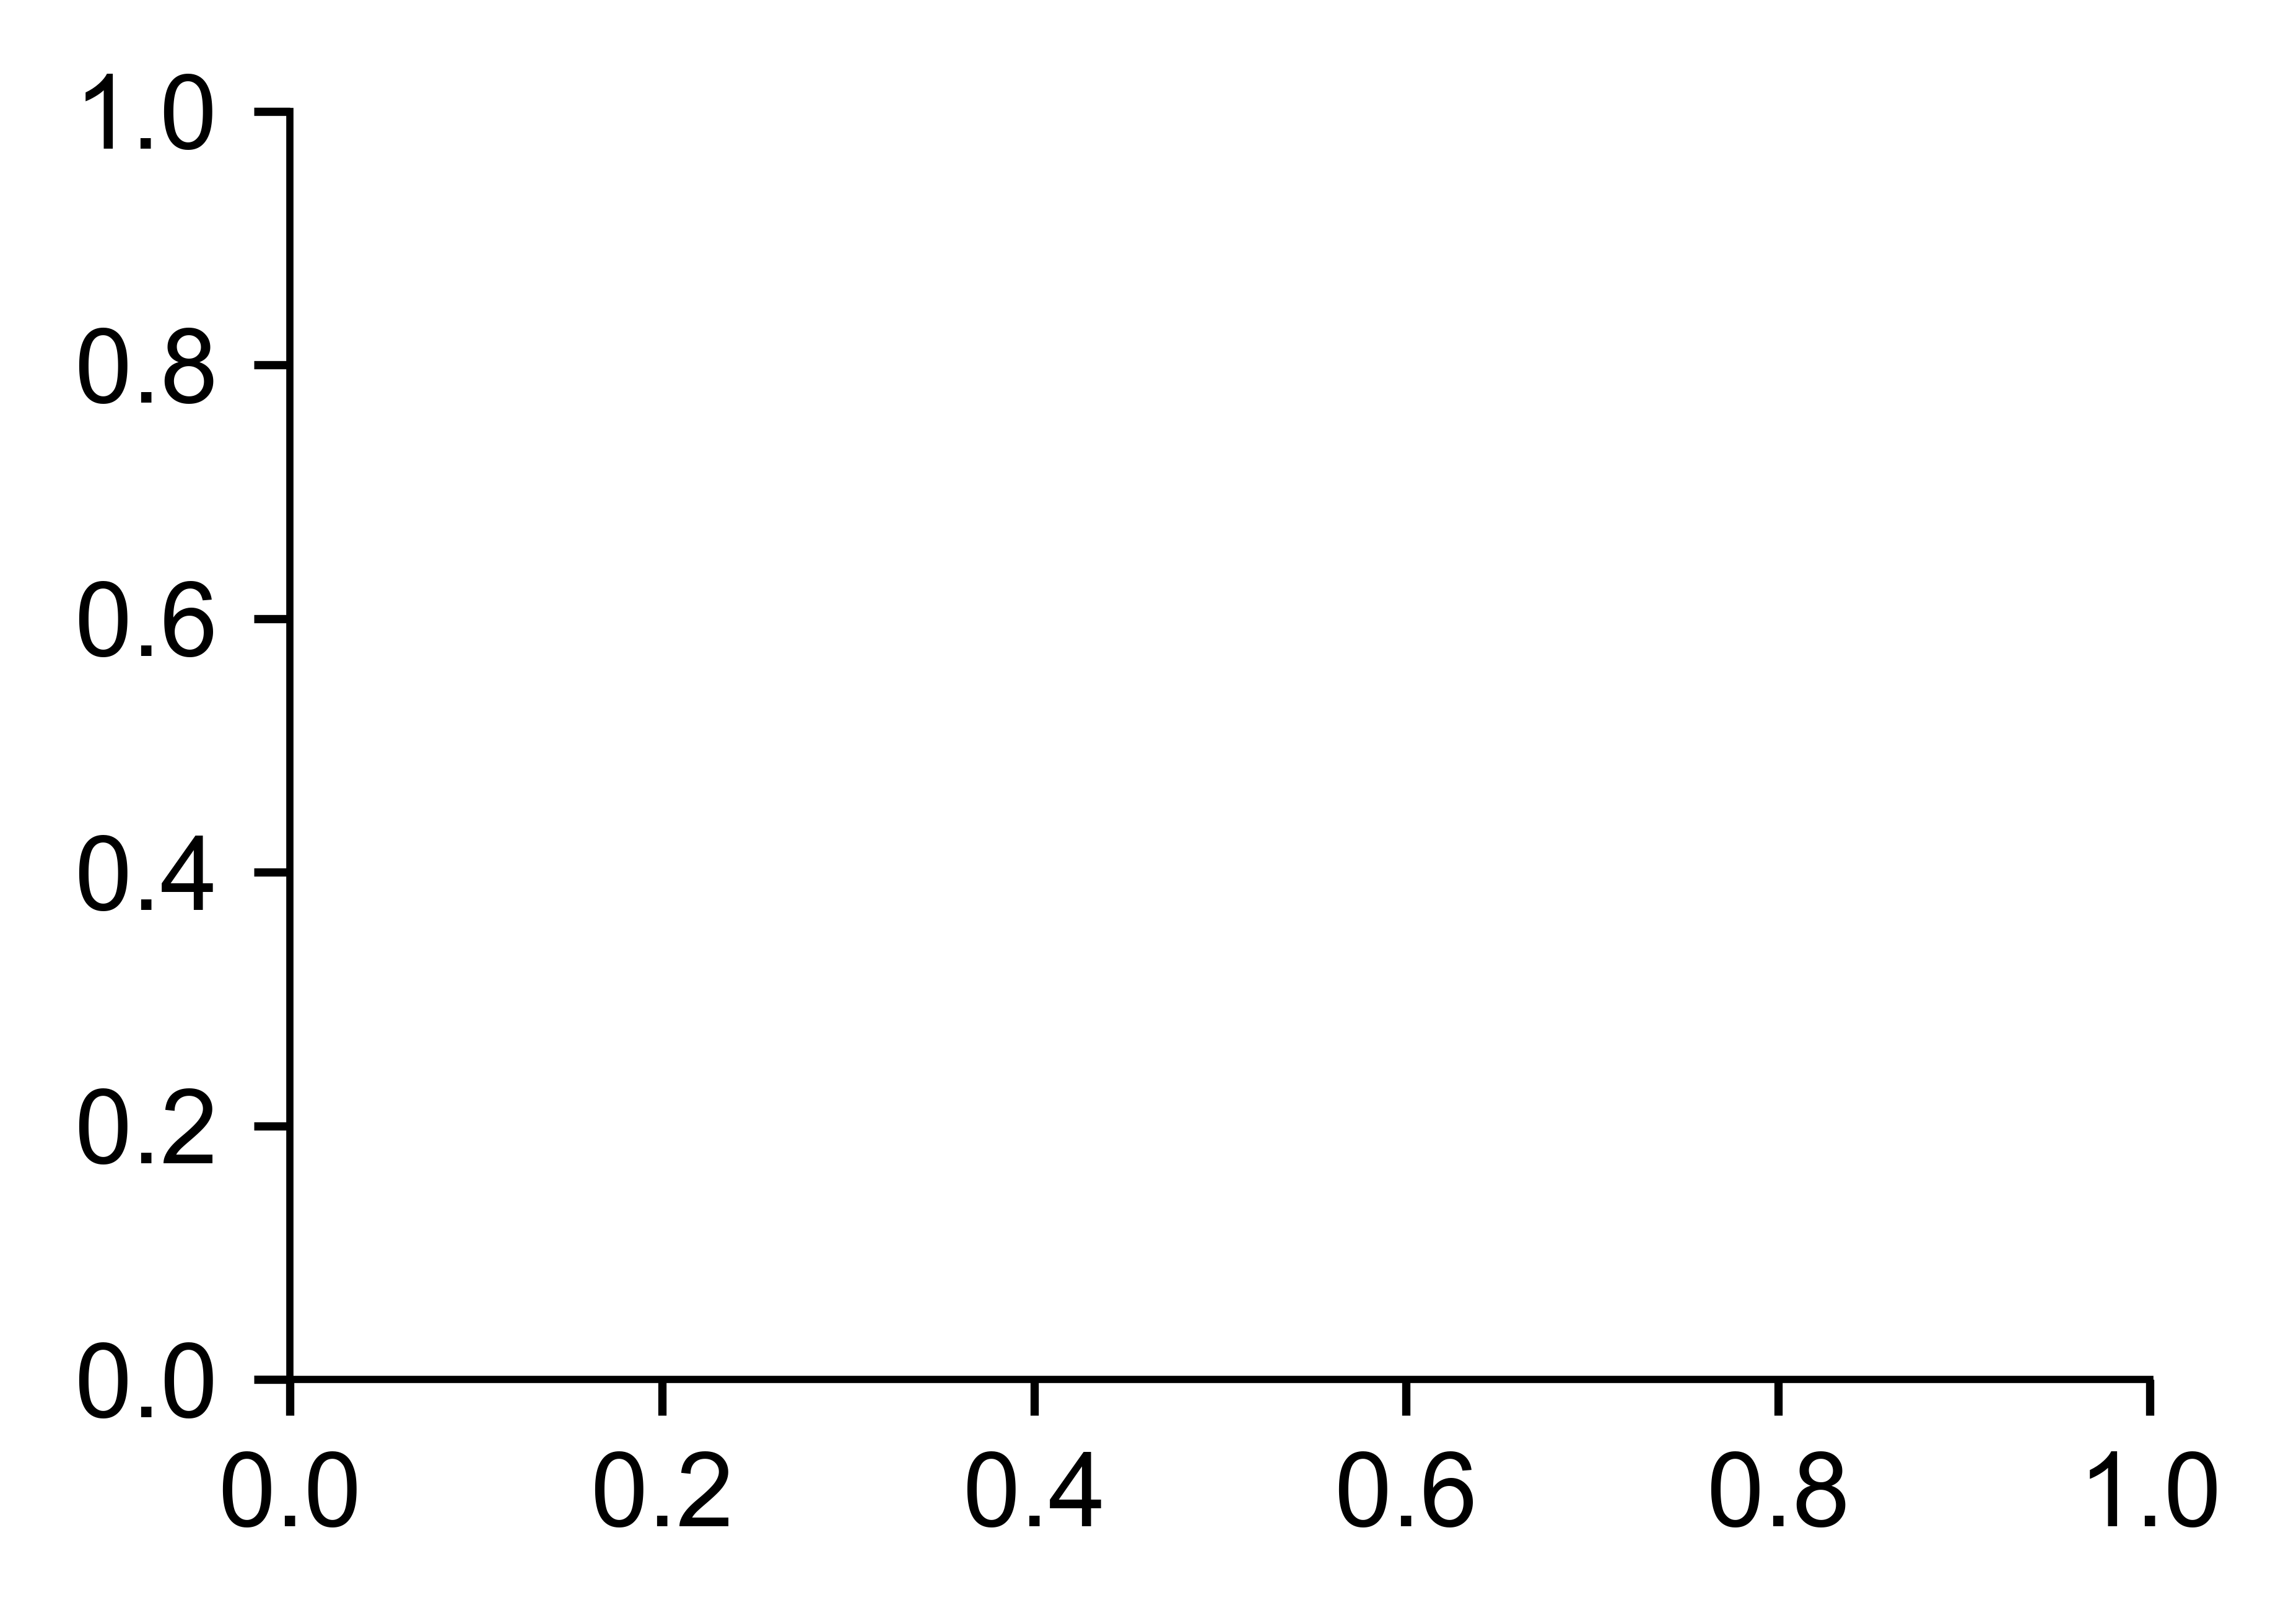

In [24]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)
#mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_fig_data_v7.mat')
mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_NK_13_v7.mat')
#print(mat)
fitness_K_5 = mat['Fitness'][0]
fragility_K_5 = mat['OnlyDel']
plt.scatter(fitness_K_5, fragility_K_5,s= scatter_size, color = 'b', label = 'Entire FLS')
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
plt.xlabel('Fitness' , fontdict = font_dict_axis)
plt.ylabel('Mutational fragility', fontdict = font_dict_axis)
plt.ylim(0,0.55)
plt.title('N = 14, K = 13', fontdict = font_dict_axis)
plt.savefig('Fig_3b_fragility_K_13_title.png', dpi = figure_dpi)

FileNotFoundError: [Errno 2] No such file or directory: 'Fig_3_fragility_Matlab_data\\fragility_fig_data_v7.mat'

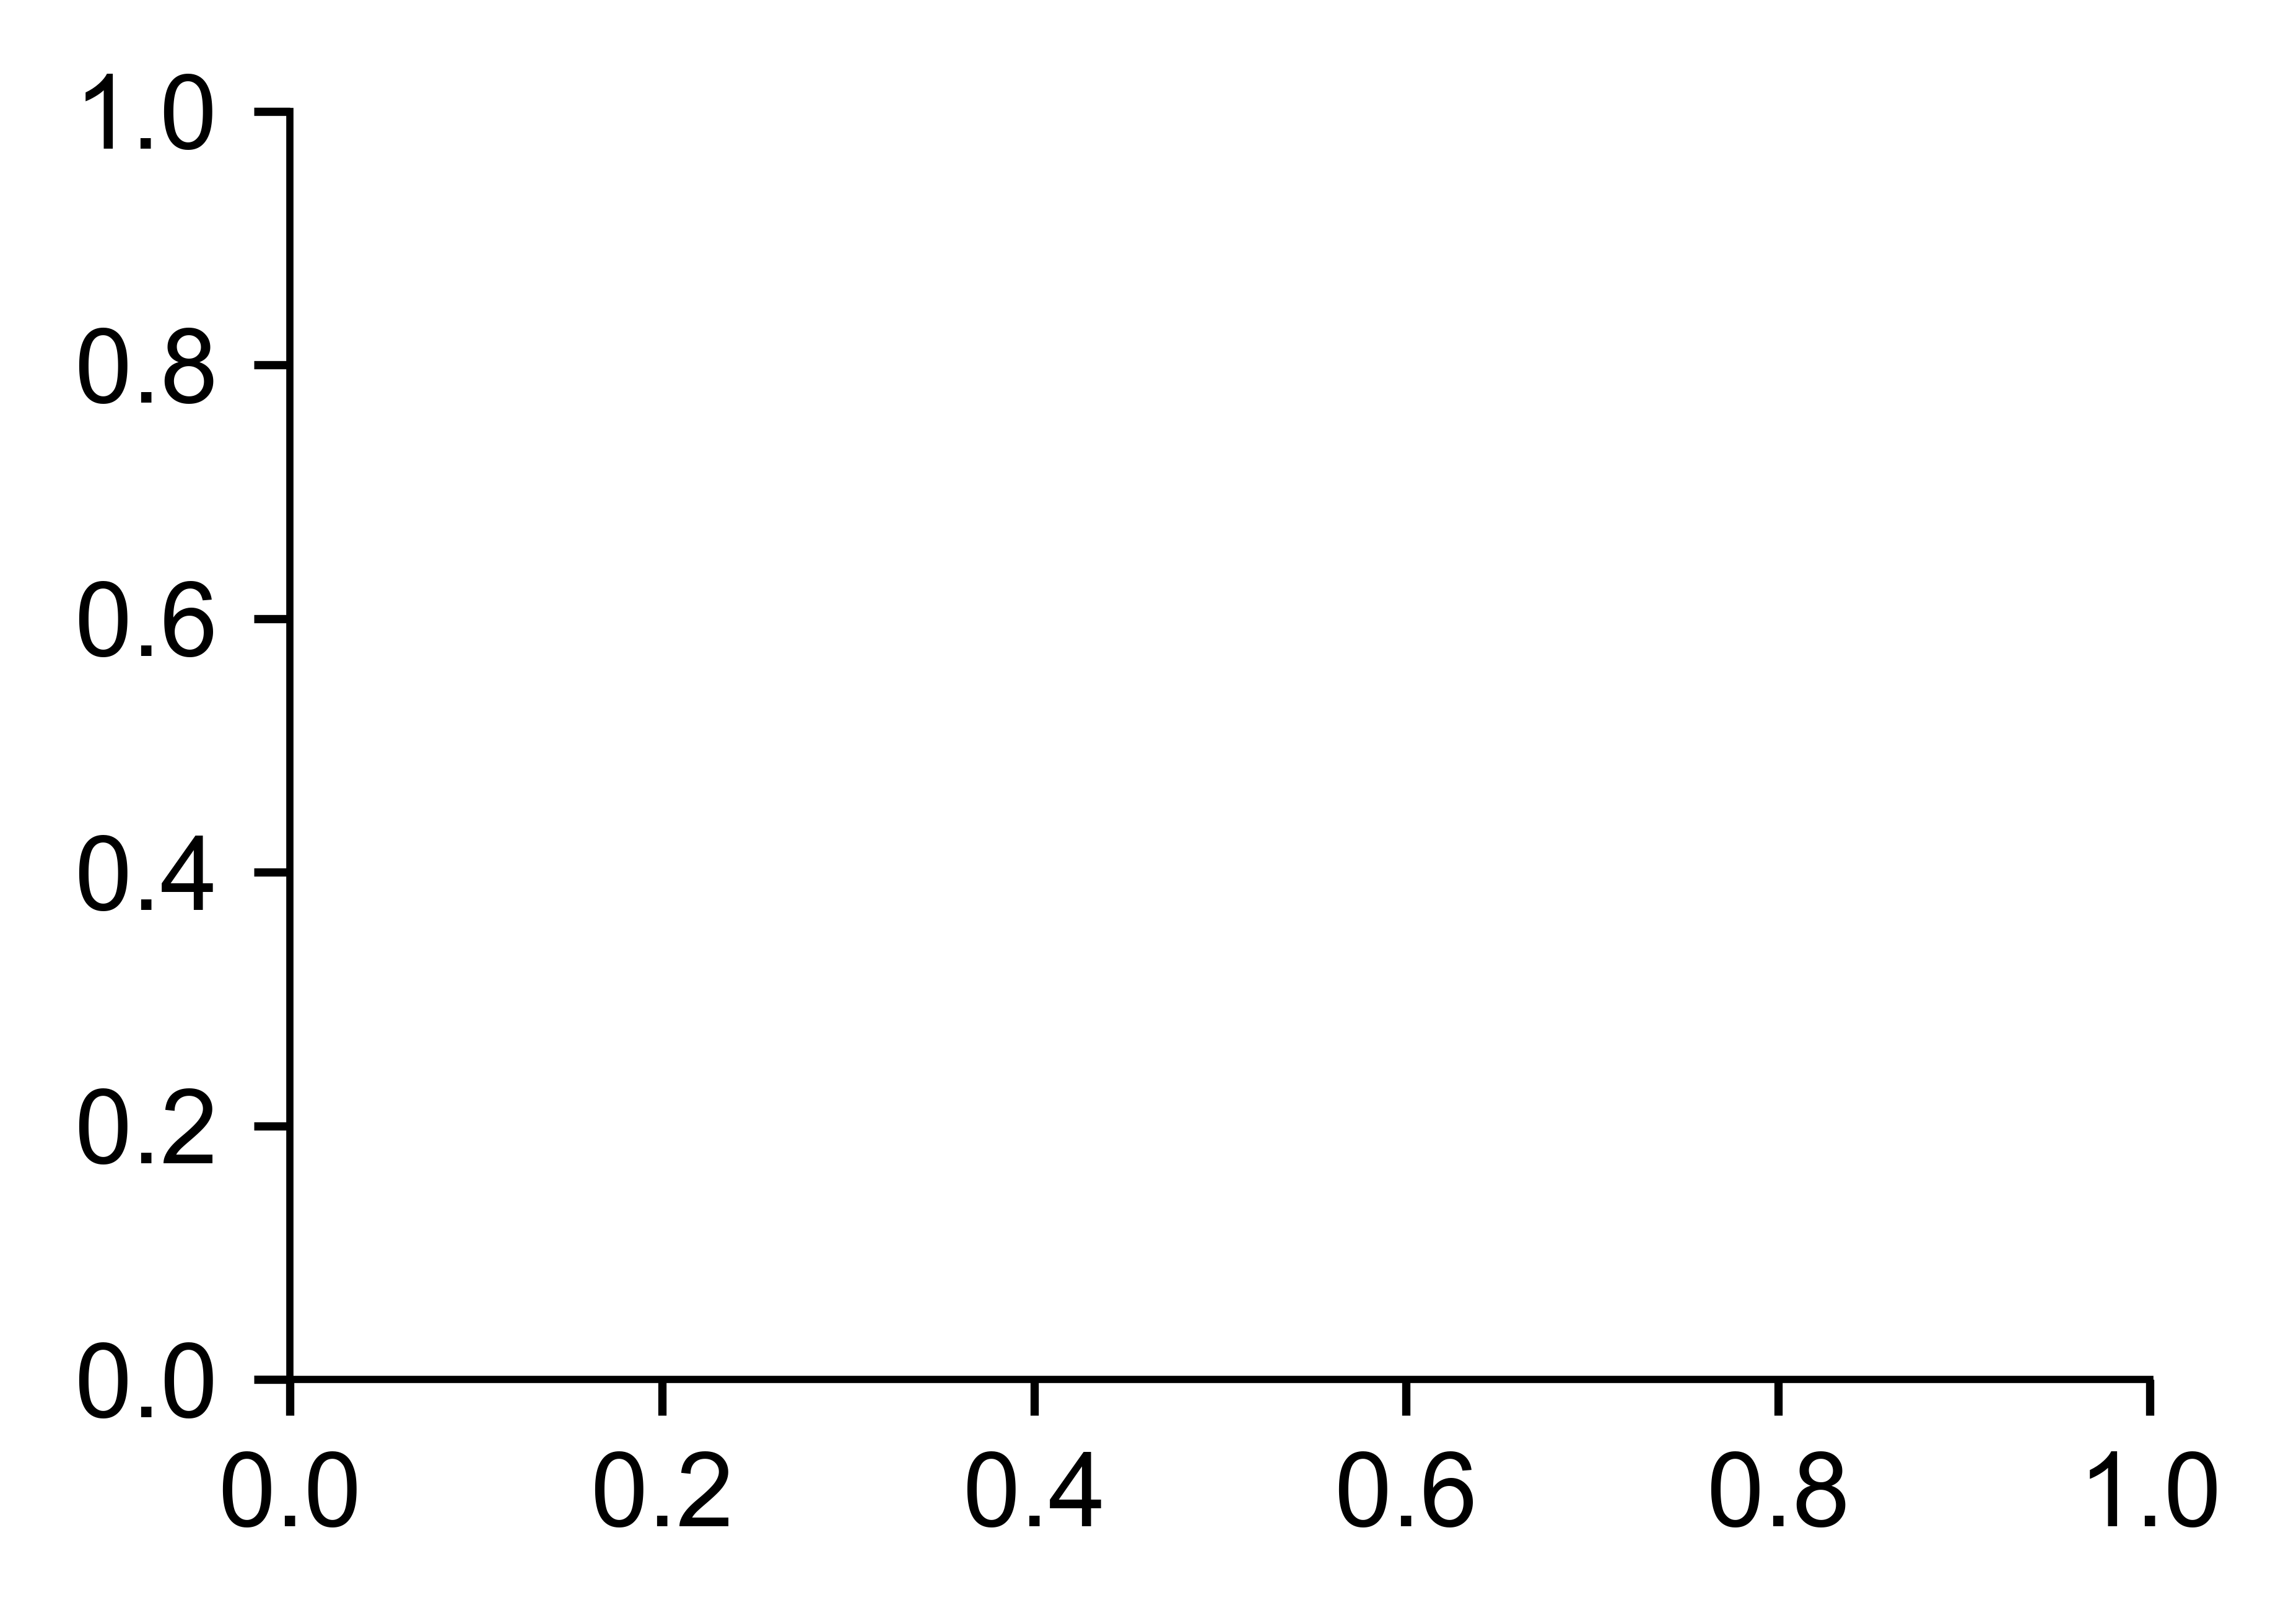

In [25]:
fig = plt.figure(figsize=fig_size,dpi = figure_dpi)
fig.subplots_adjust(left=0.2, right=0.97, top=0.92, bottom=0.22, hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)
mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_fig_data_v7.mat')
#mat = scipy.io.loadmat('Fig_3_fragility_Matlab_data\\fragility_fig_data.mat')
#print(mat)
fitness_N1 = mat['fitness_N1']
fitness_N2 = mat['fitness_N2']
fitness_N3 = mat['fitness_N3']
fitness_WT = mat['fitness_WT']
fragility_N1 = mat['fragility_N1']
fragility_N2 = mat['fragility_N2']
fragility_N3 = mat['fragility_N3']
fragility_WT = mat['fragility_WT']


# plt.scatter(fitness_N3, fragility_N3, s= scatter_size, color = '#90EE90', label = '$N_3$ and further')
# plt.scatter(fitness_N2, fragility_N2, s= scatter_size, color = 'b', label = '$N_2$')
# plt.scatter(fitness_N1, fragility_N1, s= scatter_size, color = 'r', label = '$N_1$')
plt.scatter(fitness_N3, fragility_N3, s= 5, edgecolors='g', facecolors='none', linewidth=0.25, label = '$N_3$ and further')
plt.scatter(fitness_N2, fragility_N2, s= 5, edgecolors='b', facecolors='none', linewidth=0.25, label = '$N_2$')
plt.scatter(fitness_N1, fragility_N1, s=5, edgecolors='r', facecolors='none', linewidth=0.25, label = '$N_1$')
plt.scatter(fitness_WT, fragility_WT, s= 30, color = 'k', label = 'WT')
ax.tick_params(axis='x', direction='inout', length = label_length, labelsize = 7, width = width_global)
ax.tick_params(axis='y', direction='out', length = label_length, labelsize =  7, width = width_global)
ax.grid(axis='both', color="0.8", linestyle='--', linewidth=width_grid)
plt.xlabel('Fitness' , fontdict = font_dict_axis)
plt.ylabel('Mutational fragility', fontdict = font_dict_axis)

legend = ax.legend();
frame = legend.get_frame()
frame.set_facecolor(legend_facecolour)
frame.set_edgecolor(legend_edgecolour)

#plt.savefig('Fig_2B_fragility_vs_fitness_open_symb.png', dpi = figure_dpi)

## Counting of fitness increasing trajectories

In [26]:
def trajectories_calc(df = data, root = 0, delta_vec = [0,0,0], max_index=-1, method = 'decreasing', fitness_column = 'Fit'):


    '''
    Input:

    root - the INDEX-NUMBER in data df of the genotype that we want to create trajectories from. Usually it will be 
        the WT which normally will reside in the first row (index==0)

    delta = gives you some freedom to choose what are 2 equifitness genotypes. e.g. for root it will go according to this:
        fitness(neigbour) <= fitness(root) + delta. In the 'decreasing' method we are only looking for delta-decreasing trajectories

    max_index - since 1-neig is hard to compute we usually don't have it for every index.. 
        so here is an option to control up to what index we would like to calculate the trajectories. 
        the default is this: max_index = df.shape[0]

    method - There are a few methods that can be considered here: 'decreasing' (default), 'increasing' trajectories and 
            (delta) 'neutral' networks.

    Returns:

    trajectories - pandas df that holds all the delta-decreasing/increasing/neutral trajectories and their fitnesses and their fitnesses 
        differences (only for the non-neutral methods)

    '''
    # Creates a product easy to work with - but it's slower than the recursive function.

    trajectories = pd.DataFrame(columns=['father', 'father_fitness', 'child', 'child_fitness', 
                               'grandchild', 'grandchild_fitness', 'g_grandchild', 
                               'g_grandchild_fitness'])

    dict2append = {'father' : 0, 'father_fitness' : 0 , 'child': 0, 'child_fitness': 0, 
                   'grandchild': 0, 'grandchild_fitness': 0, 'g_grandchild': 0, 
                   'g_grandchild_fitness' : 0}

    dict2append['father'] = root
    dict2append['father_fitness'] = df.loc[root, fitness_column]

    if max_index<0:
        max_index = df.shape[0]

    root_neig = df.loc[root]['1-neig-indices'] # The indexes in data of the 1-neig of the root-index
    neig_data = df.loc[root_neig]
    if method == 'decreasing':
        root_lower_fit = list(neig_data[neig_data[fitness_column] <= (df.loc[root,fitness_column] - delta_vec[0])].index.values)
    elif method == 'increasing':
        root_lower_fit = list(neig_data[neig_data[fitness_column] >= (df.loc[root,fitness_column] + delta_vec[0])].index.values)
    elif method == 'neutral':
        root_lower_fit = list(neig_data[(neig_data[fitness_column] <= (df.loc[root,fitness_column] + delta_vec[0])) & 
                                        (neig_data[fitness_column] >= (df.loc[root,fitness_column] - delta_vec[0]))].index.values)
    else:
        print('unknown method named {}'.format(method))
        return -1
    # Truncating lower_fit to be only with indexes up to 24K where we have data
    root_lower_fit = [x for x in root_lower_fit if x < max_index]

    counter = 0

    for child in root_lower_fit:

        dict2append['child'] = child
        dict2append['child_fitness'] = df.loc[child, fitness_column]

        child_neig = df.loc[child]['1-neig-indices']
        neig_data = df.loc[child_neig]

        if method == 'decreasing':
            child_lower_fit = list(neig_data[neig_data[fitness_column] <= (df.loc[child,fitness_column] - delta_vec[1])].index.values)
        elif method == 'increasing':
            child_lower_fit = list(neig_data[neig_data[fitness_column] >= (df.loc[child,fitness_column] + delta_vec[1])].index.values)
        elif method == 'neutral':
            child_lower_fit = list(neig_data[(neig_data[fitness_column] <= (df.loc[child,fitness_column] + delta_vec[1])) & 
                                  (neig_data[fitness_column] >= (df.loc[child,fitness_column] - delta_vec[1]))].index.values)

        child_lower_fit = [x for x in child_lower_fit if x < max_index]

        for grandchild in child_lower_fit:

            dict2append['grandchild'] = grandchild  # This is last father in the recursion function
            dict2append['grandchild_fitness'] = df.loc[grandchild, fitness_column]

            #grandchild_neig = df.loc[grandchild]['1-neig-indices']
            #neig_data = df.loc[grandchild_neig]

            trajectories = trajectories.append(dict2append, ignore_index=True)

            counter = counter + 1
            if counter%5000==0:
                print("{} trajectories have been calculated so far".format(counter))

            '''if method == 'decreasing':
                grandchild_lower_fit = list(neig_data[neig_data[fitness_column] <= (df.loc[grandchild,fitness_column] - delta_vec[2])].index.values)
            elif method == 'increasing':
                grandchild_lower_fit = list(neig_data[neig_data[fitness_column] >= (df.loc[grandchild,fitness_column] + delta_vec[2])].index.values)
            elif method == 'neutral':
                grandchild_lower_fit = list(neig_data[(neig_data[fitness_column] <= (df.loc[grandchild,fitness_column] + delta_vec[2])) & 
                                      (neig_data[fitness_column] >= (df.loc[grandchild,fitness_column] - delta_vec[2]))].index.values)

            grandchild_lower_fit = [x for x in grandchild_lower_fit if x < max_index]

            for g_grandchild in grandchild_lower_fit:

                dict2append['g_grandchild'] = g_grandchild  # These are the leaves of the recursion function
                dict2append['g_grandchild_fitness'] = df.loc[g_grandchild, fitness_column]

                trajectories = trajectories.append(dict2append, ignore_index=True) # .append here works different than lists
                counter = counter + 1
                if counter%5000==0:
                    print("{} trajectories have been calculated so far".format(counter))'''

    if method != 'neutral':

        trajectories['father_child_grad'] = trajectories['father_fitness']-trajectories['child_fitness']
        trajectories['child_grandchild_grad'] = trajectories['child_fitness']-trajectories['grandchild_fitness']
        trajectories['grandchild_ggrandchild_grad'] = trajectories['grandchild_fitness'] - trajectories['g_grandchild_fitness']
        trajectories['total_descent'] = trajectories['father_child_grad'] + trajectories['child_grandchild_grad'] + trajectories['grandchild_ggrandchild_grad'] 

    return trajectories     

In [27]:
# In the following I calculate paths of length 2 to 3 with different delta values corresponding to 0.95 confidence for the whole trajectory
# The function 'trna_e_pipe.trajectories_calc' calculates trajectories of length 3 with minimal fitness differences at each step as defined in the argument 'delta_vec'
# 'root' in the function is the focal genotype from which trajectories begin. It is currently=0 which means it takes the first on the list, i.e. the WT. 
# to calculate length-2 trajectories simply set the last fitness step as a very negative value, such that it does not limit the last step. 
# This however creates redundant counts (trajectories that differ only in last step). To remove them run the additional fucntion 
# calc_length_2_trajectories on the output of the first function.


data['geomean_fitRel'] = GeometricMeanFitRel

fitter_traj_2_step = trajectories_calc(df = data, method = 'increasing', delta_vec = [0.0279, 0.0279, -10], fitness_column='geomean_fitRel')
fitter_traj_3_step = trajectories_calc(df = data, method = 'increasing', delta_vec = [0.0306]*3, fitness_column='geomean_fitRel')


fitter_traj_3_step.shape

(108, 12)

In [28]:
# to calc the amount of 2 step trajectories, just use this small function:
def calc_length_2_trajectories(df)->int:
    root = df['father'].values
    child = df['child'].values
    grandchild = df['grandchild'].values
    two_step_possible_trajectories = list(set(list(zip(root, child, grandchild))))
    return len(two_step_possible_trajectories)

In [29]:
# now calculate the number of 2-step trajectories by refining the 3-step count with the correct Delta
calc_length_2_trajectories(fitter_traj_2_step)

142